In [7]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 30
    batch_size = 32
    test_size = 0.5 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr = 0.001 #slowed learningrate # 0.1 after 20 epoch full

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
calculating on: cpu
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2447, -0.1818,  0.2593,  ..., -0.3372, -0.3360, -0.3371],
        [-0.2309, -0.2157,  0.2257,  ..., -0.3165, -0.3153, -0.3164],
        [-0.2343, -0.2549,  0.2200,  ..., -0.3162, -0.3152, -0.3164]])
train:shuffel = False
eval:shuffel = False


Epoch: 0
      Training_acc: 0.6161971830985915
-------------------

Epoch: 1
      Training_acc: 0.6161971830985915
-------------------

Epoch: 2
      Training_acc: 0.6161971830985915
-------------------

Epoch: 3
      Training_acc: 0.6161971830985915
-------------------

Epoch: 4
      Training_acc: 0.6161971830985915
-------------------

Epoch: 5
      Training_acc: 0.6161971830985915
-------------------

Epoch: 6
      Training_acc: 0.6338028169014085
-------------------

Epoch: 7
      Training_acc: 0.7077464788732394
-------------------

Epoch: 8
      Training_acc: 0.8309859154929577
-------------------

Epoch: 9
      Training_acc: 0.8838028169014085
-------------------

Epoch: 10
      Training_acc: 0.9119718309859155
-------------------

Epoch: 11
      Training_acc: 0.9119718309859155
-------------------

Epoch: 12
      Training_acc: 0.9190140845070423
-------------------

Epoch: 13
      Training_acc: 0.926056338028169
-------------------

Epoch: 14
      Training_acc: 0

0it [00:00, ?it/s]

(1, 29, 30)


1it [00:00,  5.55it/s]

(2, 29, 30)


2it [00:00,  5.19it/s]

(3, 29, 30)


3it [00:00,  5.30it/s]

(4, 29, 30)


4it [00:00,  5.26it/s]

(5, 29, 30)


5it [00:00,  5.26it/s]

(6, 29, 30)


6it [00:01,  5.46it/s]

(7, 29, 30)


7it [00:01,  5.30it/s]

(8, 29, 30)


8it [00:01,  5.05it/s]

(9, 29, 30)


9it [00:01,  5.25it/s]

Progess: 2.96%
test acc: 63.86%
test Loss: 0.69
-------------------
(10, 29, 30)


10it [00:01,  5.21it/s]

(11, 29, 30)


11it [00:02,  5.30it/s]

(12, 29, 30)


12it [00:02,  5.21it/s]

(13, 29, 30)


13it [00:02,  5.38it/s]

(14, 29, 30)


14it [00:02,  5.39it/s]

(15, 29, 30)


15it [00:02,  5.39it/s]

(16, 29, 30)


16it [00:03,  5.45it/s]

(17, 29, 30)


17it [00:03,  5.37it/s]

(18, 29, 30)


18it [00:03,  5.52it/s]

Progess: 6.30%
test acc: 63.86%
test Loss: 0.68
-------------------
(19, 29, 30)


19it [00:03,  5.54it/s]

(20, 29, 30)


20it [00:03,  5.13it/s]

(21, 29, 30)


21it [00:03,  5.30it/s]

(22, 29, 30)


22it [00:04,  5.29it/s]

(23, 29, 30)


23it [00:04,  5.31it/s]

(24, 29, 30)


24it [00:04,  5.23it/s]

(25, 29, 30)


25it [00:04,  5.42it/s]

(26, 29, 30)


26it [00:04,  5.49it/s]

(27, 29, 30)


27it [00:05,  5.63it/s]

Progess: 9.63%
test acc: 63.86%
test Loss: 0.67
-------------------
(28, 29, 30)


28it [00:05,  5.41it/s]

(29, 29, 30)


29it [00:05,  5.58it/s]

(30, 29, 30)


30it [00:05,  5.40it/s]

(31, 29, 30)


31it [00:05,  5.40it/s]

(32, 29, 30)


32it [00:05,  5.35it/s]

(33, 29, 30)


33it [00:06,  4.91it/s]

(34, 29, 30)


34it [00:06,  5.20it/s]

(35, 29, 30)


35it [00:06,  5.41it/s]

(36, 29, 30)


36it [00:06,  5.46it/s]

Progess: 12.96%
test acc: 63.86%
test Loss: 0.67
-------------------
(37, 29, 30)


37it [00:06,  5.41it/s]

(38, 29, 30)


38it [00:07,  5.38it/s]

(39, 29, 30)


39it [00:07,  5.39it/s]

(40, 29, 30)


40it [00:07,  5.41it/s]

(41, 29, 30)


41it [00:07,  5.45it/s]

(42, 29, 30)


42it [00:07,  5.51it/s]

(43, 29, 30)


43it [00:08,  5.49it/s]

(44, 29, 30)


44it [00:08,  5.26it/s]

(45, 29, 30)


45it [00:08,  5.14it/s]

Progess: 16.30%
test acc: 63.86%
test Loss: 0.67
-------------------
(46, 29, 30)


46it [00:08,  5.18it/s]

(47, 29, 30)


47it [00:08,  4.91it/s]

(48, 29, 30)


48it [00:09,  5.02it/s]

(49, 29, 30)


49it [00:09,  5.16it/s]

(50, 29, 30)


50it [00:09,  5.17it/s]

(51, 29, 30)


51it [00:09,  5.28it/s]

(52, 29, 30)


52it [00:09,  5.24it/s]

(53, 29, 30)


53it [00:09,  5.41it/s]

(54, 29, 30)


54it [00:10,  5.29it/s]

Progess: 19.63%
test acc: 63.86%
test Loss: 0.66
-------------------
(55, 29, 30)


55it [00:10,  5.29it/s]

(56, 29, 30)


56it [00:10,  4.98it/s]

(57, 29, 30)


57it [00:10,  5.04it/s]

(58, 29, 30)


58it [00:10,  5.24it/s]

(59, 29, 30)


59it [00:11,  5.20it/s]

(60, 29, 30)


60it [00:11,  5.26it/s]

(61, 29, 30)


61it [00:11,  5.42it/s]

(62, 29, 30)


62it [00:11,  5.40it/s]

(63, 29, 30)


63it [00:11,  5.36it/s]

Progess: 22.96%
test acc: 65.26%
test Loss: 0.66
-------------------
(64, 29, 30)


64it [00:12,  5.27it/s]

(65, 29, 30)


65it [00:12,  5.27it/s]

(66, 29, 30)


66it [00:12,  5.34it/s]

(67, 29, 30)


67it [00:12,  5.23it/s]

(68, 29, 30)


68it [00:12,  5.10it/s]

(69, 29, 30)


69it [00:13,  5.15it/s]

(70, 29, 30)


70it [00:13,  4.85it/s]

(71, 29, 30)


71it [00:13,  4.94it/s]

(72, 29, 30)


72it [00:13,  5.07it/s]

Progess: 26.30%
test acc: 72.28%
test Loss: 0.66
-------------------
(73, 29, 30)


73it [00:13,  5.18it/s]

(74, 29, 30)


74it [00:14,  5.24it/s]

(75, 29, 30)


75it [00:14,  5.19it/s]

(76, 29, 30)


76it [00:14,  5.24it/s]

(77, 29, 30)


77it [00:14,  5.26it/s]

(78, 29, 30)


78it [00:14,  5.47it/s]

(79, 29, 30)


79it [00:14,  5.43it/s]

(80, 29, 30)


80it [00:15,  5.42it/s]

(81, 29, 30)


81it [00:15,  5.35it/s]

Progess: 29.63%
test acc: 79.49%
test Loss: 0.65
-------------------
(82, 29, 30)


82it [00:15,  5.03it/s]

(83, 29, 30)


83it [00:15,  5.12it/s]

(84, 29, 30)


84it [00:15,  5.08it/s]

(85, 29, 30)


85it [00:16,  5.18it/s]

(86, 29, 30)


86it [00:16,  5.25it/s]

(87, 29, 30)


87it [00:16,  4.85it/s]

(88, 29, 30)


88it [00:16,  4.86it/s]

(89, 29, 30)


89it [00:16,  4.96it/s]

(90, 29, 30)


90it [00:17,  4.97it/s]

Progess: 32.96%
test acc: 84.44%
test Loss: 0.65
-------------------
(91, 29, 30)


91it [00:17,  5.02it/s]

(92, 29, 30)


92it [00:17,  5.10it/s]

(93, 29, 30)


93it [00:17,  5.21it/s]

(94, 29, 30)


94it [00:17,  5.28it/s]

(95, 29, 30)


95it [00:18,  5.34it/s]

(96, 29, 30)


96it [00:18,  5.21it/s]

(97, 29, 30)


97it [00:18,  5.27it/s]

(98, 29, 30)


98it [00:18,  5.19it/s]

(99, 29, 30)


99it [00:18,  5.20it/s]

Progess: 36.30%
test acc: 86.51%
test Loss: 0.64
-------------------
(100, 29, 30)


100it [00:19,  5.23it/s]

(101, 29, 30)


101it [00:19,  5.22it/s]

(102, 29, 30)


102it [00:19,  5.32it/s]

(103, 29, 30)


103it [00:19,  5.44it/s]

(104, 29, 30)


104it [00:19,  5.35it/s]

(105, 29, 30)


105it [00:19,  5.39it/s]

(106, 29, 30)


106it [00:20,  5.36it/s]

(107, 29, 30)


107it [00:20,  5.48it/s]

(108, 29, 30)


108it [00:20,  5.49it/s]

Progess: 39.63%
test acc: 88.15%
test Loss: 0.64
-------------------
(109, 29, 30)


109it [00:20,  4.97it/s]

(110, 29, 30)


110it [00:20,  5.20it/s]

(111, 29, 30)


111it [00:21,  5.20it/s]

(112, 29, 30)


112it [00:21,  5.15it/s]

(113, 29, 30)


113it [00:21,  5.06it/s]

(114, 29, 30)


114it [00:21,  4.93it/s]

(115, 29, 30)


115it [00:21,  5.01it/s]

(116, 29, 30)


116it [00:22,  5.18it/s]

(117, 29, 30)


117it [00:22,  5.29it/s]

Progess: 42.96%
test acc: 88.77%
test Loss: 0.63
-------------------
(118, 29, 30)


118it [00:22,  5.10it/s]

(119, 29, 30)


119it [00:22,  4.88it/s]

(120, 29, 30)


120it [00:22,  4.96it/s]

(121, 29, 30)


121it [00:23,  4.91it/s]

(122, 29, 30)


122it [00:23,  5.17it/s]

(123, 29, 30)


123it [00:23,  4.99it/s]

(124, 29, 30)


124it [00:23,  5.07it/s]

(125, 29, 30)


125it [00:23,  5.17it/s]

(126, 29, 30)


126it [00:24,  5.27it/s]

Progess: 46.30%
test acc: 89.32%
test Loss: 0.62
-------------------
(127, 29, 30)


127it [00:24,  5.50it/s]

(128, 29, 30)


128it [00:24,  5.51it/s]

(129, 29, 30)


129it [00:24,  5.66it/s]

(130, 29, 30)


130it [00:24,  5.77it/s]

(131, 29, 30)


131it [00:24,  5.78it/s]

(132, 29, 30)


132it [00:25,  5.49it/s]

(133, 29, 30)


133it [00:25,  5.16it/s]

(134, 29, 30)


134it [00:25,  5.36it/s]

(135, 29, 30)


135it [00:25,  5.50it/s]

Progess: 49.63%
test acc: 89.79%
test Loss: 0.61
-------------------
(136, 29, 30)


136it [00:25,  5.50it/s]

(137, 29, 30)


137it [00:26,  5.68it/s]

(138, 29, 30)


138it [00:26,  5.77it/s]

(139, 29, 30)


139it [00:26,  5.65it/s]

(140, 29, 30)


140it [00:26,  5.57it/s]

(141, 29, 30)


141it [00:26,  5.68it/s]

(142, 29, 30)


142it [00:26,  5.79it/s]

(143, 29, 30)


143it [00:27,  5.88it/s]

(144, 29, 30)


144it [00:27,  6.02it/s]

Progess: 52.96%
test acc: 89.98%
test Loss: 0.61
-------------------
(145, 29, 30)


145it [00:27,  6.00it/s]

(146, 29, 30)


146it [00:27,  5.88it/s]

(147, 29, 30)


147it [00:27,  5.98it/s]

(148, 29, 30)


148it [00:27,  5.90it/s]

(149, 29, 30)


149it [00:28,  5.92it/s]

(150, 29, 30)


150it [00:28,  6.02it/s]

(151, 29, 30)


151it [00:28,  6.18it/s]

(152, 29, 30)


152it [00:28,  6.09it/s]

(153, 29, 30)


153it [00:28,  6.08it/s]

Progess: 56.30%
test acc: 89.94%
test Loss: 0.60
-------------------
(154, 29, 30)


154it [00:28,  6.06it/s]

(155, 29, 30)


155it [00:29,  5.69it/s]

(156, 29, 30)


156it [00:29,  5.79it/s]

(157, 29, 30)


157it [00:29,  5.93it/s]

(158, 29, 30)


158it [00:29,  5.96it/s]

(159, 29, 30)


159it [00:29,  6.03it/s]

(160, 29, 30)


160it [00:29,  6.11it/s]

(161, 29, 30)


161it [00:30,  6.12it/s]

(162, 29, 30)


162it [00:30,  5.52it/s]

Progess: 59.63%
test acc: 90.06%
test Loss: 0.59
-------------------
(163, 29, 30)


163it [00:30,  5.58it/s]

(164, 29, 30)


164it [00:30,  5.75it/s]

(165, 29, 30)


165it [00:30,  5.89it/s]

(166, 29, 30)


166it [00:30,  5.81it/s]

(167, 29, 30)


167it [00:31,  5.75it/s]

(168, 29, 30)


168it [00:31,  5.77it/s]

(169, 29, 30)


169it [00:31,  5.97it/s]

(170, 29, 30)


170it [00:31,  6.09it/s]

(171, 29, 30)


171it [00:31,  5.95it/s]

Progess: 62.96%
test acc: 90.14%
test Loss: 0.59
-------------------
(172, 29, 30)


172it [00:31,  6.13it/s]

(173, 29, 30)


173it [00:32,  5.92it/s]

(174, 29, 30)


174it [00:32,  5.96it/s]

(175, 29, 30)


175it [00:32,  5.77it/s]

(176, 29, 30)


176it [00:32,  5.86it/s]

(177, 29, 30)


177it [00:32,  5.87it/s]

(178, 29, 30)


178it [00:33,  5.48it/s]

(179, 29, 30)


179it [00:33,  5.53it/s]

(180, 29, 30)


180it [00:33,  5.68it/s]

Progess: 66.30%
test acc: 90.18%
test Loss: 0.58
-------------------
(181, 29, 30)


181it [00:33,  5.75it/s]

(182, 29, 30)


182it [00:33,  5.79it/s]

(183, 29, 30)


183it [00:33,  5.82it/s]

(184, 29, 30)


184it [00:34,  5.81it/s]

(185, 29, 30)


185it [00:34,  5.76it/s]

(186, 29, 30)


186it [00:34,  5.84it/s]

(187, 29, 30)


187it [00:34,  5.71it/s]

(188, 29, 30)


188it [00:34,  5.48it/s]

(189, 29, 30)


189it [00:34,  5.56it/s]

Progess: 69.63%
test acc: 90.18%
test Loss: 0.57
-------------------
(190, 29, 30)


190it [00:35,  5.66it/s]

(191, 29, 30)


191it [00:35,  5.23it/s]

(192, 29, 30)


192it [00:35,  5.46it/s]

(193, 29, 30)


193it [00:35,  5.46it/s]

(194, 29, 30)


194it [00:35,  5.63it/s]

(195, 29, 30)


195it [00:36,  5.80it/s]

(196, 29, 30)


196it [00:36,  5.84it/s]

(197, 29, 30)


197it [00:36,  5.91it/s]

(198, 29, 30)


198it [00:36,  5.76it/s]

Progess: 72.96%
test acc: 90.18%
test Loss: 0.57
-------------------
(199, 29, 30)


199it [00:36,  5.84it/s]

(200, 29, 30)


200it [00:36,  5.85it/s]

(201, 29, 30)


201it [00:37,  5.95it/s]

(202, 29, 30)


202it [00:37,  5.53it/s]

(203, 29, 30)


203it [00:37,  5.60it/s]

(204, 29, 30)


204it [00:37,  5.66it/s]

(205, 29, 30)


205it [00:37,  5.56it/s]

(206, 29, 30)


206it [00:37,  5.64it/s]

(207, 29, 30)


207it [00:38,  5.79it/s]

Progess: 76.30%
test acc: 90.14%
test Loss: 0.56
-------------------
(208, 29, 30)


208it [00:38,  5.89it/s]

(209, 29, 30)


209it [00:38,  5.79it/s]

(210, 29, 30)


210it [00:38,  5.79it/s]

(211, 29, 30)


211it [00:38,  5.80it/s]

(212, 29, 30)


212it [00:38,  5.74it/s]

(213, 29, 30)


213it [00:39,  5.62it/s]

(214, 29, 30)


214it [00:39,  5.49it/s]

(215, 29, 30)


215it [00:39,  5.08it/s]

(216, 29, 30)


216it [00:39,  5.15it/s]

Progess: 79.63%
test acc: 90.14%
test Loss: 0.55
-------------------
(217, 29, 30)


217it [00:39,  5.16it/s]

(218, 29, 30)


218it [00:40,  5.15it/s]

(219, 29, 30)


219it [00:40,  5.17it/s]

(220, 29, 30)


220it [00:40,  5.14it/s]

(221, 29, 30)


221it [00:40,  4.99it/s]

(222, 29, 30)


222it [00:40,  5.11it/s]

(223, 29, 30)


223it [00:41,  5.27it/s]

(224, 29, 30)


224it [00:41,  5.04it/s]

(225, 29, 30)


225it [00:41,  5.24it/s]

Progess: 82.96%
test acc: 90.14%
test Loss: 0.55
-------------------
(226, 29, 30)


226it [00:41,  5.43it/s]

(227, 29, 30)


227it [00:41,  5.68it/s]

(228, 29, 30)


228it [00:42,  5.52it/s]

(229, 29, 30)


229it [00:42,  5.46it/s]

(230, 29, 30)


230it [00:42,  5.49it/s]

(231, 29, 30)


231it [00:42,  5.46it/s]

(232, 29, 30)


232it [00:42,  5.59it/s]

(233, 29, 30)


233it [00:42,  5.72it/s]

(234, 29, 30)


234it [00:43,  5.74it/s]

Progess: 86.30%
test acc: 90.18%
test Loss: 0.54
-------------------
(235, 29, 30)


235it [00:43,  5.72it/s]

(236, 29, 30)


236it [00:43,  5.71it/s]

(237, 29, 30)


237it [00:43,  5.33it/s]

(238, 29, 30)


238it [00:43,  5.37it/s]

(239, 29, 30)


239it [00:44,  5.54it/s]

(240, 29, 30)


240it [00:44,  5.47it/s]

(241, 29, 30)


241it [00:44,  5.52it/s]

(242, 29, 30)


242it [00:44,  5.52it/s]

(243, 29, 30)


243it [00:44,  5.50it/s]

Progess: 89.63%
test acc: 90.18%
test Loss: 0.54
-------------------
(244, 29, 30)


244it [00:44,  5.68it/s]

(245, 29, 30)


245it [00:45,  5.85it/s]

(246, 29, 30)


246it [00:45,  5.85it/s]

(247, 29, 30)


247it [00:45,  5.51it/s]

(248, 29, 30)


248it [00:45,  5.37it/s]

(249, 29, 30)


249it [00:45,  5.04it/s]

(250, 29, 30)


250it [00:46,  4.92it/s]

(251, 29, 30)


251it [00:46,  4.95it/s]

(252, 29, 30)


252it [00:46,  4.89it/s]

Progess: 92.96%
test acc: 90.18%
test Loss: 0.53
-------------------
(253, 29, 30)


253it [00:46,  4.99it/s]

(254, 29, 30)


254it [00:46,  5.17it/s]

(255, 29, 30)


255it [00:47,  5.45it/s]

(256, 29, 30)


256it [00:47,  5.53it/s]

(257, 29, 30)


257it [00:47,  5.55it/s]

(258, 29, 30)


258it [00:47,  5.44it/s]

(259, 29, 30)


259it [00:47,  5.43it/s]

(260, 29, 30)


260it [00:47,  5.27it/s]

(261, 29, 30)


261it [00:48,  5.17it/s]

Progess: 96.30%
test acc: 90.14%
test Loss: 0.53
-------------------
(262, 29, 30)


262it [00:48,  5.33it/s]

(263, 29, 30)


263it [00:48,  5.29it/s]

(264, 29, 30)


264it [00:48,  5.56it/s]

(265, 29, 30)


265it [00:48,  5.76it/s]

(266, 29, 30)


266it [00:49,  5.37it/s]

(267, 29, 30)


267it [00:49,  5.55it/s]

(268, 29, 30)


268it [00:49,  5.80it/s]

(269, 29, 30)


269it [00:49,  5.87it/s]

(270, 29, 30)


270it [00:49,  5.43it/s]


Progess: 99.63%
test acc: 90.14%
test Loss: 0.52
-------------------
(30, 29, 30)
./Models


plotting trainingResults...
cosine_similarity
percentageWeightsSignDifference3
weightsMagnitude3
L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters
0
0.06658605
1
0.08884735
2
0.1265005
3
0.051435743
4
0.18511425
5
0.17562054
6
0.19916892
7
0.082749635
8
0.09218734
9
0.012244918
10
0.15987381
11
0.050757643
12
0.02619652
13
0.114514135
14
0.10940762
15
0.1381043
16
0.0199051
17
0.031236777
18
0.075640135
19
0.2275712
20
0.010069182
21
0.07852419
22
0.07039491
23
0.072886914
24
0.10880717
25
0.009926379
26
0.013248425
27
0.08775279
28
0.23591658
29
0.012242996
30
0.075016044
31
0.07888283
32
0.08465032
33
0.12303332
34
0.0056962855
35
0.024973411
36
0.07941847
37
0.2298782
38
0.008711981
39
0.06943892
40
0.08448809
41
0.0902716
42
0.12808143
43
0.005970546
44
0.02476

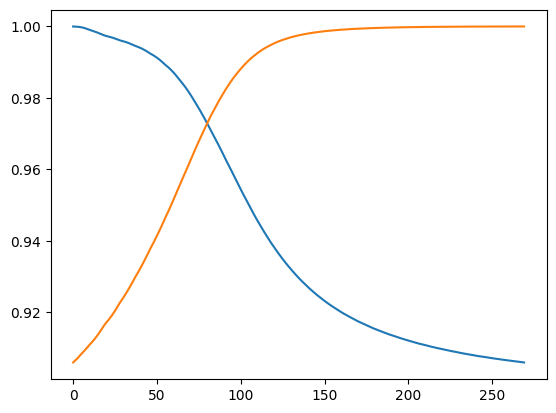

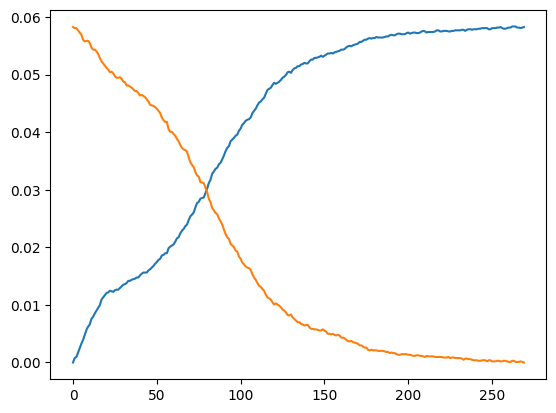

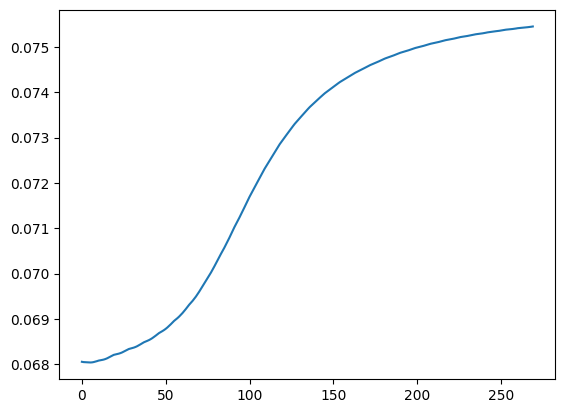

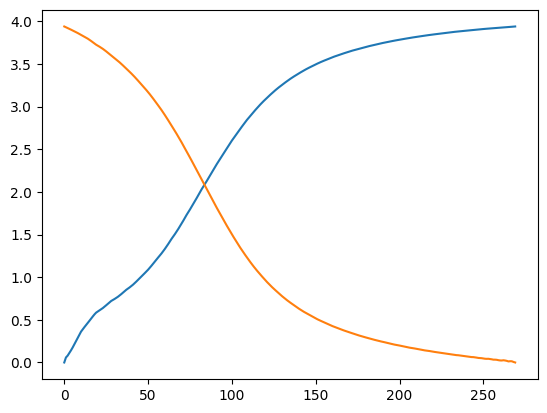

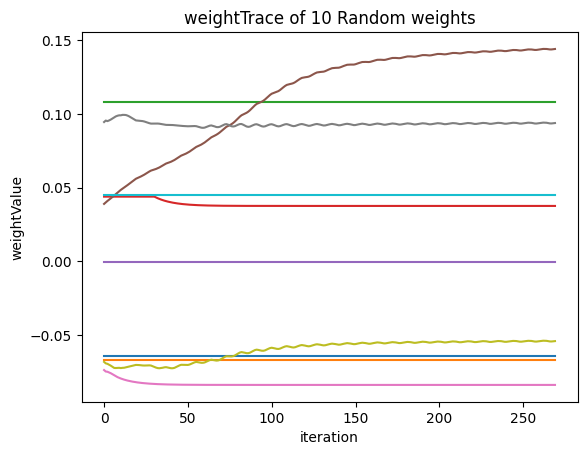

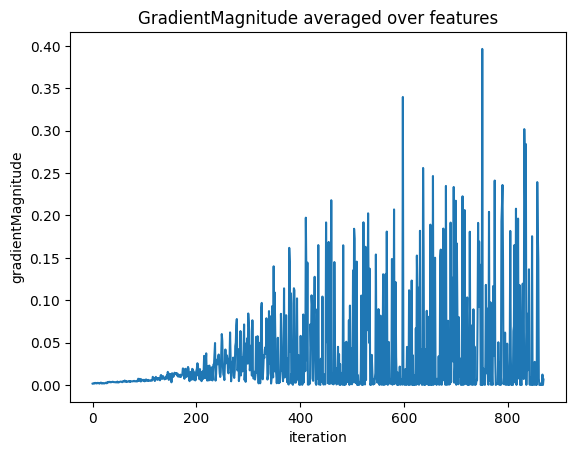

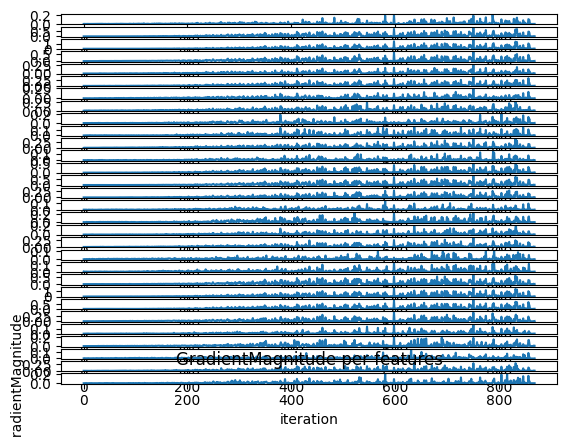

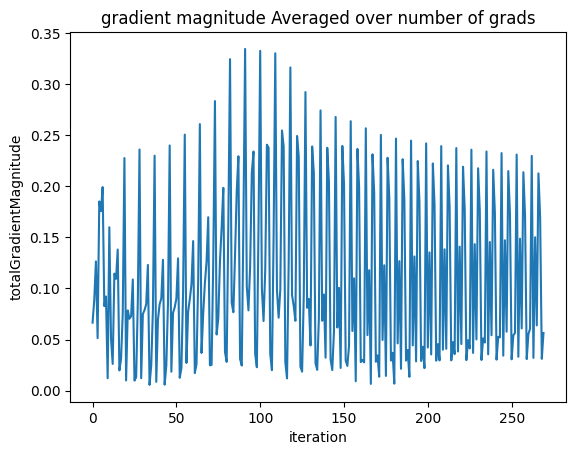

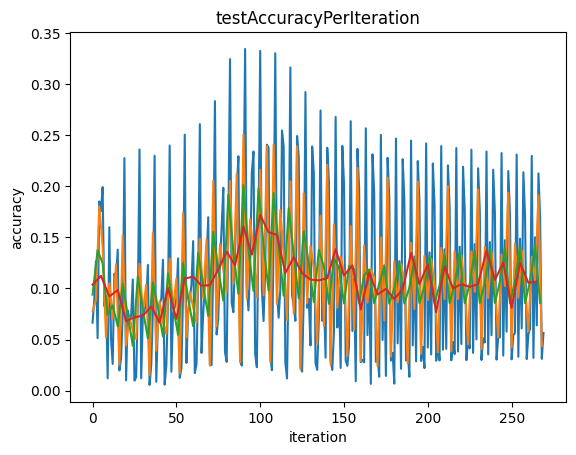

In [8]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [9]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





(30, 29, 30)
numerical


  0%|          | 0/270 [00:00<?, ?it/s]

0


  0%|          | 1/270 [00:00<01:02,  4.33it/s]

1


  1%|          | 2/270 [00:00<00:59,  4.52it/s]

2


  1%|          | 3/270 [00:00<00:57,  4.62it/s]

3


  1%|▏         | 4/270 [00:00<00:56,  4.70it/s]

4


  2%|▏         | 5/270 [00:01<00:56,  4.70it/s]

5


  2%|▏         | 6/270 [00:01<00:56,  4.71it/s]

6


  3%|▎         | 7/270 [00:01<00:55,  4.71it/s]

7


  3%|▎         | 8/270 [00:01<00:55,  4.72it/s]

8


  3%|▎         | 9/270 [00:01<00:55,  4.68it/s]

9


  4%|▎         | 10/270 [00:02<00:55,  4.66it/s]

10


  4%|▍         | 11/270 [00:02<00:55,  4.64it/s]

11


  4%|▍         | 12/270 [00:02<00:55,  4.65it/s]

12


  5%|▍         | 13/270 [00:02<00:56,  4.56it/s]

13


  5%|▌         | 14/270 [00:03<00:56,  4.52it/s]

14


  6%|▌         | 15/270 [00:03<00:55,  4.57it/s]

15


  6%|▌         | 16/270 [00:03<00:55,  4.59it/s]

16


  6%|▋         | 17/270 [00:03<00:55,  4.58it/s]

17


  7%|▋         | 18/270 [00:03<00:55,  4.51it/s]

18


  7%|▋         | 19/270 [00:04<00:55,  4.56it/s]

19


  7%|▋         | 20/270 [00:04<00:54,  4.55it/s]

20


  8%|▊         | 21/270 [00:04<00:54,  4.57it/s]

21


  8%|▊         | 22/270 [00:04<00:55,  4.48it/s]

22


  9%|▊         | 23/270 [00:05<00:55,  4.49it/s]

23


  9%|▉         | 24/270 [00:05<00:54,  4.48it/s]

24


  9%|▉         | 25/270 [00:05<00:55,  4.42it/s]

25


 10%|▉         | 26/270 [00:05<00:54,  4.49it/s]

26


 10%|█         | 27/270 [00:05<00:54,  4.45it/s]

27


 10%|█         | 28/270 [00:06<00:54,  4.47it/s]

28


 11%|█         | 29/270 [00:06<00:55,  4.36it/s]

29


 11%|█         | 30/270 [00:06<00:55,  4.29it/s]

30


 11%|█▏        | 31/270 [00:06<00:54,  4.39it/s]

31


 12%|█▏        | 32/270 [00:07<00:53,  4.42it/s]

32


 12%|█▏        | 33/270 [00:07<00:52,  4.50it/s]

33


 13%|█▎        | 34/270 [00:07<00:51,  4.56it/s]

34


 13%|█▎        | 35/270 [00:07<00:51,  4.57it/s]

35


 13%|█▎        | 36/270 [00:07<00:50,  4.63it/s]

36


 14%|█▎        | 37/270 [00:08<00:51,  4.56it/s]

37


 14%|█▍        | 38/270 [00:08<00:50,  4.60it/s]

38


 14%|█▍        | 39/270 [00:08<00:49,  4.70it/s]

39


 15%|█▍        | 40/270 [00:08<00:48,  4.71it/s]

40


 15%|█▌        | 41/270 [00:08<00:48,  4.70it/s]

41


 16%|█▌        | 42/270 [00:09<00:48,  4.72it/s]

42


 16%|█▌        | 43/270 [00:09<00:47,  4.77it/s]

43


 16%|█▋        | 44/270 [00:09<00:47,  4.73it/s]

44


 17%|█▋        | 45/270 [00:09<00:47,  4.73it/s]

45


 17%|█▋        | 46/270 [00:10<00:47,  4.76it/s]

46


 17%|█▋        | 47/270 [00:10<00:46,  4.78it/s]

47


 18%|█▊        | 48/270 [00:10<00:46,  4.82it/s]

48


 18%|█▊        | 49/270 [00:10<00:46,  4.77it/s]

49


 19%|█▊        | 50/270 [00:10<00:46,  4.75it/s]

50


 19%|█▉        | 51/270 [00:11<00:45,  4.78it/s]

51


 19%|█▉        | 52/270 [00:11<00:45,  4.79it/s]

52


 20%|█▉        | 53/270 [00:11<00:45,  4.77it/s]

53


 20%|██        | 54/270 [00:11<00:46,  4.67it/s]

54


 20%|██        | 55/270 [00:11<00:47,  4.56it/s]

55


 21%|██        | 56/270 [00:12<00:47,  4.53it/s]

56


 21%|██        | 57/270 [00:12<00:47,  4.52it/s]

57


 21%|██▏       | 58/270 [00:12<00:45,  4.63it/s]

58


 22%|██▏       | 59/270 [00:12<00:45,  4.61it/s]

59


 22%|██▏       | 60/270 [00:13<00:45,  4.62it/s]

60


 23%|██▎       | 61/270 [00:13<00:44,  4.65it/s]

61


 23%|██▎       | 62/270 [00:13<00:45,  4.57it/s]

62


 23%|██▎       | 63/270 [00:13<00:46,  4.50it/s]

63


 24%|██▎       | 64/270 [00:13<00:44,  4.59it/s]

64


 24%|██▍       | 65/270 [00:14<00:44,  4.65it/s]

65


 24%|██▍       | 66/270 [00:14<00:43,  4.65it/s]

66


 25%|██▍       | 67/270 [00:14<00:43,  4.65it/s]

67


 25%|██▌       | 68/270 [00:14<00:43,  4.69it/s]

68


 26%|██▌       | 69/270 [00:14<00:42,  4.72it/s]

69


 26%|██▌       | 70/270 [00:15<00:42,  4.70it/s]

70


 26%|██▋       | 71/270 [00:15<00:41,  4.76it/s]

71


 27%|██▋       | 72/270 [00:15<00:41,  4.76it/s]

72


 27%|██▋       | 73/270 [00:15<00:41,  4.80it/s]

73


 27%|██▋       | 74/270 [00:16<00:42,  4.65it/s]

74


 28%|██▊       | 75/270 [00:16<00:42,  4.62it/s]

75


 28%|██▊       | 76/270 [00:16<00:42,  4.56it/s]

76


 29%|██▊       | 77/270 [00:16<00:42,  4.52it/s]

77


 29%|██▉       | 78/270 [00:16<00:43,  4.42it/s]

78


 29%|██▉       | 79/270 [00:17<00:43,  4.43it/s]

79


 30%|██▉       | 80/270 [00:17<00:43,  4.39it/s]

80


 30%|███       | 81/270 [00:17<00:42,  4.47it/s]

81


 30%|███       | 82/270 [00:17<00:41,  4.52it/s]

82


 31%|███       | 83/270 [00:18<00:41,  4.53it/s]

83


 31%|███       | 84/270 [00:18<00:40,  4.57it/s]

84


 31%|███▏      | 85/270 [00:18<00:39,  4.65it/s]

85


 32%|███▏      | 86/270 [00:18<00:39,  4.69it/s]

86


 32%|███▏      | 87/270 [00:18<00:38,  4.72it/s]

87


 33%|███▎      | 88/270 [00:19<00:38,  4.76it/s]

88


 33%|███▎      | 89/270 [00:19<00:37,  4.77it/s]

89


 33%|███▎      | 90/270 [00:19<00:38,  4.64it/s]

90


 34%|███▎      | 91/270 [00:19<00:38,  4.66it/s]

91


 34%|███▍      | 92/270 [00:19<00:38,  4.57it/s]

92


 34%|███▍      | 93/270 [00:20<00:38,  4.60it/s]

93


 35%|███▍      | 94/270 [00:20<00:37,  4.67it/s]

94


 35%|███▌      | 95/270 [00:20<00:36,  4.74it/s]

95


 36%|███▌      | 96/270 [00:20<00:38,  4.56it/s]

96


 36%|███▌      | 97/270 [00:21<00:37,  4.65it/s]

97


 36%|███▋      | 98/270 [00:21<00:36,  4.66it/s]

98


 37%|███▋      | 99/270 [00:21<00:36,  4.70it/s]

99


 37%|███▋      | 100/270 [00:21<00:36,  4.71it/s]

100


 37%|███▋      | 101/270 [00:21<00:35,  4.74it/s]

101


 38%|███▊      | 102/270 [00:22<00:35,  4.76it/s]

102


 38%|███▊      | 103/270 [00:22<00:35,  4.70it/s]

103


 39%|███▊      | 104/270 [00:22<00:35,  4.69it/s]

104


 39%|███▉      | 105/270 [00:22<00:34,  4.74it/s]

105


 39%|███▉      | 106/270 [00:22<00:34,  4.78it/s]

106


 40%|███▉      | 107/270 [00:23<00:34,  4.79it/s]

107


 40%|████      | 108/270 [00:23<00:33,  4.78it/s]

108


 40%|████      | 109/270 [00:23<00:33,  4.77it/s]

109


 41%|████      | 110/270 [00:23<00:33,  4.80it/s]

110


 41%|████      | 111/270 [00:23<00:33,  4.74it/s]

111


 41%|████▏     | 112/270 [00:24<00:33,  4.74it/s]

112


 42%|████▏     | 113/270 [00:24<00:33,  4.69it/s]

113


 42%|████▏     | 114/270 [00:24<00:33,  4.68it/s]

114


 43%|████▎     | 115/270 [00:24<00:33,  4.67it/s]

115


 43%|████▎     | 116/270 [00:25<00:32,  4.71it/s]

116


 43%|████▎     | 117/270 [00:25<00:32,  4.68it/s]

117


 44%|████▎     | 118/270 [00:25<00:32,  4.71it/s]

118


 44%|████▍     | 119/270 [00:25<00:32,  4.69it/s]

119


 44%|████▍     | 120/270 [00:25<00:31,  4.73it/s]

120


 45%|████▍     | 121/270 [00:26<00:31,  4.69it/s]

121


 45%|████▌     | 122/270 [00:26<00:31,  4.68it/s]

122


 46%|████▌     | 123/270 [00:26<00:31,  4.69it/s]

123


 46%|████▌     | 124/270 [00:26<00:31,  4.68it/s]

124


 46%|████▋     | 125/270 [00:26<00:30,  4.75it/s]

125


 47%|████▋     | 126/270 [00:27<00:30,  4.76it/s]

126


 47%|████▋     | 127/270 [00:27<00:30,  4.71it/s]

127


 47%|████▋     | 128/270 [00:27<00:30,  4.71it/s]

128


 48%|████▊     | 129/270 [00:27<00:29,  4.79it/s]

129


 48%|████▊     | 130/270 [00:28<00:29,  4.74it/s]

130


 49%|████▊     | 131/270 [00:28<00:29,  4.67it/s]

131


 49%|████▉     | 132/270 [00:28<00:30,  4.58it/s]

132


 49%|████▉     | 133/270 [00:28<00:31,  4.39it/s]

133


 50%|████▉     | 134/270 [00:28<00:31,  4.33it/s]

134


 50%|█████     | 135/270 [00:29<00:30,  4.44it/s]

135


 50%|█████     | 136/270 [00:29<00:29,  4.55it/s]

136


 51%|█████     | 137/270 [00:29<00:28,  4.59it/s]

137


 51%|█████     | 138/270 [00:29<00:28,  4.61it/s]

138


 51%|█████▏    | 139/270 [00:30<00:28,  4.63it/s]

139


 52%|█████▏    | 140/270 [00:30<00:28,  4.63it/s]

140


 52%|█████▏    | 141/270 [00:30<00:28,  4.51it/s]

141


 53%|█████▎    | 142/270 [00:30<00:27,  4.58it/s]

142


 53%|█████▎    | 143/270 [00:30<00:27,  4.69it/s]

143


 53%|█████▎    | 144/270 [00:31<00:26,  4.72it/s]

144


 54%|█████▎    | 145/270 [00:31<00:26,  4.69it/s]

145


 54%|█████▍    | 146/270 [00:31<00:26,  4.66it/s]

146


 54%|█████▍    | 147/270 [00:31<00:26,  4.68it/s]

147


 55%|█████▍    | 148/270 [00:31<00:26,  4.65it/s]

148


 55%|█████▌    | 149/270 [00:32<00:25,  4.70it/s]

149


 56%|█████▌    | 150/270 [00:32<00:25,  4.67it/s]

150


 56%|█████▌    | 151/270 [00:32<00:25,  4.69it/s]

151


 56%|█████▋    | 152/270 [00:32<00:25,  4.70it/s]

152


 57%|█████▋    | 153/270 [00:33<00:24,  4.72it/s]

153


 57%|█████▋    | 154/270 [00:33<00:24,  4.74it/s]

154


 57%|█████▋    | 155/270 [00:33<00:24,  4.75it/s]

155


 58%|█████▊    | 156/270 [00:33<00:24,  4.68it/s]

156


 58%|█████▊    | 157/270 [00:33<00:24,  4.69it/s]

157


 59%|█████▊    | 158/270 [00:34<00:23,  4.73it/s]

158


 59%|█████▉    | 159/270 [00:34<00:23,  4.76it/s]

159


 59%|█████▉    | 160/270 [00:34<00:23,  4.72it/s]

160


 60%|█████▉    | 161/270 [00:34<00:22,  4.76it/s]

161


 60%|██████    | 162/270 [00:34<00:22,  4.72it/s]

162


 60%|██████    | 163/270 [00:35<00:23,  4.47it/s]

163


 61%|██████    | 164/270 [00:35<00:23,  4.53it/s]

164


 61%|██████    | 165/270 [00:35<00:22,  4.61it/s]

165


 61%|██████▏   | 166/270 [00:35<00:22,  4.63it/s]

166


 62%|██████▏   | 167/270 [00:36<00:21,  4.70it/s]

167


 62%|██████▏   | 168/270 [00:36<00:21,  4.70it/s]

168


 63%|██████▎   | 169/270 [00:36<00:21,  4.71it/s]

169


 63%|██████▎   | 170/270 [00:36<00:21,  4.75it/s]

170


 63%|██████▎   | 171/270 [00:36<00:20,  4.73it/s]

171


 64%|██████▎   | 172/270 [00:37<00:20,  4.71it/s]

172


 64%|██████▍   | 173/270 [00:37<00:20,  4.76it/s]

173


 64%|██████▍   | 174/270 [00:37<00:20,  4.75it/s]

174


 65%|██████▍   | 175/270 [00:37<00:19,  4.78it/s]

175


 65%|██████▌   | 176/270 [00:37<00:19,  4.77it/s]

176


 66%|██████▌   | 177/270 [00:38<00:19,  4.80it/s]

177


 66%|██████▌   | 178/270 [00:38<00:19,  4.79it/s]

178


 66%|██████▋   | 179/270 [00:38<00:19,  4.78it/s]

179


 67%|██████▋   | 180/270 [00:38<00:18,  4.81it/s]

180


 67%|██████▋   | 181/270 [00:38<00:18,  4.77it/s]

181


 67%|██████▋   | 182/270 [00:39<00:18,  4.76it/s]

182


 68%|██████▊   | 183/270 [00:39<00:18,  4.73it/s]

183


 68%|██████▊   | 184/270 [00:39<00:18,  4.71it/s]

184


 69%|██████▊   | 185/270 [00:39<00:18,  4.68it/s]

185


 69%|██████▉   | 186/270 [00:40<00:17,  4.67it/s]

186


 69%|██████▉   | 187/270 [00:40<00:17,  4.68it/s]

187


 70%|██████▉   | 188/270 [00:40<00:17,  4.67it/s]

188


 70%|███████   | 189/270 [00:40<00:17,  4.61it/s]

189


 70%|███████   | 190/270 [00:40<00:17,  4.62it/s]

190


 71%|███████   | 191/270 [00:41<00:16,  4.67it/s]

191


 71%|███████   | 192/270 [00:41<00:17,  4.48it/s]

192


 71%|███████▏  | 193/270 [00:41<00:17,  4.44it/s]

193


 72%|███████▏  | 194/270 [00:41<00:16,  4.51it/s]

194


 72%|███████▏  | 195/270 [00:42<00:16,  4.47it/s]

195


 73%|███████▎  | 196/270 [00:42<00:16,  4.52it/s]

196


 73%|███████▎  | 197/270 [00:42<00:15,  4.58it/s]

197


 73%|███████▎  | 198/270 [00:42<00:15,  4.62it/s]

198


 74%|███████▎  | 199/270 [00:42<00:15,  4.64it/s]

199


 74%|███████▍  | 200/270 [00:43<00:14,  4.67it/s]

200


 74%|███████▍  | 201/270 [00:43<00:14,  4.70it/s]

201


 75%|███████▍  | 202/270 [00:43<00:14,  4.70it/s]

202


 75%|███████▌  | 203/270 [00:43<00:14,  4.68it/s]

203


 76%|███████▌  | 204/270 [00:43<00:13,  4.75it/s]

204


 76%|███████▌  | 205/270 [00:44<00:13,  4.80it/s]

205


 76%|███████▋  | 206/270 [00:44<00:13,  4.78it/s]

206


 77%|███████▋  | 207/270 [00:44<00:13,  4.71it/s]

207


 77%|███████▋  | 208/270 [00:44<00:13,  4.76it/s]

208


 77%|███████▋  | 209/270 [00:44<00:12,  4.71it/s]

209


 78%|███████▊  | 210/270 [00:45<00:12,  4.66it/s]

210


 78%|███████▊  | 211/270 [00:45<00:12,  4.58it/s]

211


 79%|███████▊  | 212/270 [00:45<00:13,  4.43it/s]

212


 79%|███████▉  | 213/270 [00:45<00:13,  4.38it/s]

213


 79%|███████▉  | 214/270 [00:46<00:12,  4.32it/s]

214


 80%|███████▉  | 215/270 [00:46<00:12,  4.32it/s]

215


 80%|████████  | 216/270 [00:46<00:12,  4.39it/s]

216


 80%|████████  | 217/270 [00:46<00:12,  4.21it/s]

217


 81%|████████  | 218/270 [00:47<00:12,  4.31it/s]

218


 81%|████████  | 219/270 [00:47<00:11,  4.47it/s]

219


 81%|████████▏ | 220/270 [00:47<00:11,  4.36it/s]

220


 82%|████████▏ | 221/270 [00:47<00:11,  4.41it/s]

221


 82%|████████▏ | 222/270 [00:47<00:10,  4.45it/s]

222


 83%|████████▎ | 223/270 [00:48<00:10,  4.43it/s]

223


 83%|████████▎ | 224/270 [00:48<00:10,  4.48it/s]

224


 83%|████████▎ | 225/270 [00:48<00:09,  4.51it/s]

225


 84%|████████▎ | 226/270 [00:48<00:10,  4.36it/s]

226


 84%|████████▍ | 227/270 [00:49<00:09,  4.40it/s]

227


 84%|████████▍ | 228/270 [00:49<00:09,  4.50it/s]

228


 85%|████████▍ | 229/270 [00:49<00:09,  4.53it/s]

229


 85%|████████▌ | 230/270 [00:49<00:09,  4.37it/s]

230


 86%|████████▌ | 231/270 [00:49<00:08,  4.44it/s]

231


 86%|████████▌ | 232/270 [00:50<00:08,  4.52it/s]

232


 86%|████████▋ | 233/270 [00:50<00:08,  4.52it/s]

233


 87%|████████▋ | 234/270 [00:50<00:08,  4.50it/s]

234


 87%|████████▋ | 235/270 [00:50<00:07,  4.55it/s]

235


 87%|████████▋ | 236/270 [00:51<00:07,  4.37it/s]

236


 88%|████████▊ | 237/270 [00:51<00:07,  4.41it/s]

237


 88%|████████▊ | 238/270 [00:51<00:07,  4.46it/s]

238


 89%|████████▊ | 239/270 [00:51<00:06,  4.47it/s]

239


 89%|████████▉ | 240/270 [00:51<00:06,  4.51it/s]

240


 89%|████████▉ | 241/270 [00:52<00:06,  4.48it/s]

241


 90%|████████▉ | 242/270 [00:52<00:06,  4.48it/s]

242


 90%|█████████ | 243/270 [00:52<00:06,  4.49it/s]

243


 90%|█████████ | 244/270 [00:52<00:05,  4.56it/s]

244


 91%|█████████ | 245/270 [00:53<00:05,  4.61it/s]

245


 91%|█████████ | 246/270 [00:53<00:05,  4.44it/s]

246


 91%|█████████▏| 247/270 [00:53<00:05,  4.33it/s]

247


 92%|█████████▏| 248/270 [00:53<00:05,  4.31it/s]

248


 92%|█████████▏| 249/270 [00:54<00:04,  4.27it/s]

249


 93%|█████████▎| 250/270 [00:54<00:04,  4.37it/s]

250


 93%|█████████▎| 251/270 [00:54<00:04,  4.39it/s]

251


 93%|█████████▎| 252/270 [00:54<00:04,  4.27it/s]

252


 94%|█████████▎| 253/270 [00:54<00:03,  4.41it/s]

253


 94%|█████████▍| 254/270 [00:55<00:03,  4.46it/s]

254


 94%|█████████▍| 255/270 [00:55<00:03,  4.52it/s]

255


 95%|█████████▍| 256/270 [00:55<00:03,  4.59it/s]

256


 95%|█████████▌| 257/270 [00:55<00:02,  4.64it/s]

257


 96%|█████████▌| 258/270 [00:55<00:02,  4.66it/s]

258


 96%|█████████▌| 259/270 [00:56<00:02,  4.69it/s]

259


 96%|█████████▋| 260/270 [00:56<00:02,  4.71it/s]

260


 97%|█████████▋| 261/270 [00:56<00:01,  4.65it/s]

261


 97%|█████████▋| 262/270 [00:56<00:01,  4.66it/s]

262


 97%|█████████▋| 263/270 [00:57<00:01,  4.72it/s]

263


 98%|█████████▊| 264/270 [00:57<00:01,  4.77it/s]

264


 98%|█████████▊| 265/270 [00:57<00:01,  4.74it/s]

265


 99%|█████████▊| 266/270 [00:57<00:00,  4.72it/s]

266


 99%|█████████▉| 267/270 [00:57<00:00,  4.74it/s]

267


 99%|█████████▉| 268/270 [00:58<00:00,  4.79it/s]

268


100%|█████████▉| 269/270 [00:58<00:00,  4.79it/s]

269


  0%|          | 0/270 [00:00<?, ?it/s]

1394
change precision to accuracy (ONLY NAME)


  0%|          | 1/270 [00:13<58:59, 13.16s/it]

(285, 1394)
33078
0
191
[1.0]
1133
change precision to accuracy (ONLY NAME)


  1%|          | 2/270 [00:24<53:27, 11.97s/it]

(285, 1133)
21658
0
191
[1.0]
not Jaccard
1123
change precision to accuracy (ONLY NAME)


  1%|          | 3/270 [00:35<51:35, 11.59s/it]

(285, 1123)
24587
0
192
[1.0]
not Jaccard
1116
change precision to accuracy (ONLY NAME)


  1%|▏         | 4/270 [00:45<49:05, 11.07s/it]

(285, 1116)
23543
0
193
[1.0]
not Jaccard
1041
change precision to accuracy (ONLY NAME)


  2%|▏         | 5/270 [00:54<45:59, 10.41s/it]

(285, 1041)
26229
0
191
[1.0]
not Jaccard
969
change precision to accuracy (ONLY NAME)


  2%|▏         | 6/270 [01:04<44:19, 10.08s/it]

(285, 969)
18126
92
193
[0.9949500494016906]
not Jaccard
927
change precision to accuracy (ONLY NAME)


  3%|▎         | 7/270 [01:14<43:35,  9.95s/it]

(285, 927)
19466
92
193
[0.995296042540137]
not Jaccard
643
change precision to accuracy (ONLY NAME)


  3%|▎         | 8/270 [01:20<38:30,  8.82s/it]

(285, 643)
16915
92
193
[0.9945904627506321]
not Jaccard
630
change precision to accuracy (ONLY NAME)


  3%|▎         | 9/270 [01:27<35:22,  8.13s/it]

(285, 630)
20036
0
197
[1.0]
not Jaccard
665
change precision to accuracy (ONLY NAME)


  4%|▎         | 10/270 [01:33<33:31,  7.74s/it]

(285, 665)
21343
92
193
[0.9957079542803825]
not Jaccard
699
change precision to accuracy (ONLY NAME)


  4%|▍         | 11/270 [01:41<33:12,  7.69s/it]

(285, 699)
26080
0
194
[1.0]
not Jaccard
555
change precision to accuracy (ONLY NAME)


  4%|▍         | 12/270 [01:47<30:49,  7.17s/it]

(285, 555)
18162
93
192
[0.9949055053410024]
not Jaccard
518
change precision to accuracy (ONLY NAME)


  5%|▍         | 13/270 [01:53<28:33,  6.67s/it]

(285, 518)
18402
90
195
[0.9951330304996755]
not Jaccard
551
change precision to accuracy (ONLY NAME)


  5%|▌         | 14/270 [01:58<27:26,  6.43s/it]

(285, 551)
21628
90
195
[0.9958559720047887]
not Jaccard
563
change precision to accuracy (ONLY NAME)


  6%|▌         | 15/270 [02:04<26:34,  6.25s/it]

(285, 563)
24643
0
250
[1.0]
not Jaccard
472
change precision to accuracy (ONLY NAME)


  6%|▌         | 16/270 [02:09<24:53,  5.88s/it]

(285, 472)
21207
94
191
[0.9955870616402985]
not Jaccard
523
change precision to accuracy (ONLY NAME)


  6%|▋         | 17/270 [02:15<24:30,  5.81s/it]

(285, 523)
22457
92
193
[0.9959199964521708]
not Jaccard
469
change precision to accuracy (ONLY NAME)


  7%|▋         | 18/270 [02:20<23:21,  5.56s/it]

(285, 469)
20132
94
191
[0.99535251656284]
not Jaccard
370
change precision to accuracy (ONLY NAME)


  7%|▋         | 19/270 [02:24<21:13,  5.07s/it]

(285, 370)
16244
94
191
[0.9942465418043824]
not Jaccard
473
change precision to accuracy (ONLY NAME)


  7%|▋         | 20/270 [02:29<21:18,  5.11s/it]

(285, 473)
19871
0
197
[1.0]
not Jaccard
502
change precision to accuracy (ONLY NAME)


  8%|▊         | 21/270 [02:34<20:56,  5.05s/it]

(285, 502)
20068
0
197
[1.0]
not Jaccard
386
change precision to accuracy (ONLY NAME)


  8%|▊         | 22/270 [02:38<20:00,  4.84s/it]

(285, 386)
15206
0
197
[1.0]
not Jaccard
369
change precision to accuracy (ONLY NAME)


  9%|▊         | 23/270 [02:43<19:10,  4.66s/it]

(285, 369)
15306
71
214
[0.9953827144436496]
not Jaccard
437
change precision to accuracy (ONLY NAME)


  9%|▉         | 24/270 [02:47<19:15,  4.70s/it]

(285, 437)
17959
0
197
[1.0]
not Jaccard
430
change precision to accuracy (ONLY NAME)


  9%|▉         | 25/270 [02:52<18:55,  4.64s/it]

(285, 430)
17157
92
193
[0.9946663574699982]
not Jaccard
480
change precision to accuracy (ONLY NAME)


 10%|▉         | 26/270 [02:57<19:34,  4.81s/it]

(285, 480)
20333
0
197
[1.0]
not Jaccard
434
change precision to accuracy (ONLY NAME)


 10%|█         | 27/270 [03:02<19:31,  4.82s/it]

(285, 434)
16822
0
197
[1.0]
not Jaccard
353
change precision to accuracy (ONLY NAME)


 10%|█         | 28/270 [03:06<18:16,  4.53s/it]

(285, 353)
14470
92
193
[0.9936821865128417]
not Jaccard
402
change precision to accuracy (ONLY NAME)


 11%|█         | 29/270 [03:10<17:45,  4.42s/it]

(285, 402)
19349
94
191
[0.9951653551406676]
not Jaccard
333
change precision to accuracy (ONLY NAME)


 11%|█         | 30/270 [03:14<17:10,  4.29s/it]

(285, 333)
13923
71
214
[0.9949263970272975]
not Jaccard
371
change precision to accuracy (ONLY NAME)


 11%|█▏        | 31/270 [03:18<17:12,  4.32s/it]

(285, 371)
13582
94
191
[0.9931266452179]
not Jaccard
358
change precision to accuracy (ONLY NAME)


 12%|█▏        | 32/270 [03:22<16:30,  4.16s/it]

(285, 358)
14797
92
193
[0.9938209416347639]
not Jaccard
496
change precision to accuracy (ONLY NAME)


 12%|█▏        | 33/270 [03:27<17:27,  4.42s/it]

(285, 496)
20418
0
197
[1.0]
not Jaccard
336
change precision to accuracy (ONLY NAME)


 13%|█▎        | 34/270 [03:31<16:28,  4.19s/it]

(285, 336)
14432
47
238
[0.9967539194695766]
not Jaccard
443
change precision to accuracy (ONLY NAME)


 13%|█▎        | 35/270 [03:35<17:04,  4.36s/it]

(285, 443)
16722
39
246
[0.9976731698586003]
not Jaccard
389
change precision to accuracy (ONLY NAME)


 13%|█▎        | 36/270 [03:40<17:07,  4.39s/it]

(285, 389)
17452
0
191
[1.0]
not Jaccard
355
change precision to accuracy (ONLY NAME)


 14%|█▎        | 37/270 [03:44<16:46,  4.32s/it]

(285, 355)
16493
94
191
[0.9943329113160909]
not Jaccard
296
change precision to accuracy (ONLY NAME)


 14%|█▍        | 38/270 [03:48<15:41,  4.06s/it]

(285, 296)
13113
94
191
[0.9928825622775801]
not Jaccard
298
change precision to accuracy (ONLY NAME)


 14%|█▍        | 39/270 [03:51<15:24,  4.00s/it]

(285, 298)
14943
0
191
[1.0]
not Jaccard
376
change precision to accuracy (ONLY NAME)


 15%|█▍        | 40/270 [03:55<15:15,  3.98s/it]

(285, 376)
14292
92
193
[0.9936040044493882]
not Jaccard
324
change precision to accuracy (ONLY NAME)


 15%|█▌        | 41/270 [03:59<15:03,  3.95s/it]

(285, 324)
13489
71
214
[0.99476401179941]
not Jaccard
259
change precision to accuracy (ONLY NAME)


 16%|█▌        | 42/270 [04:02<14:06,  3.71s/it]

(285, 259)
12038
0
194
[1.0]
not Jaccard
232
change precision to accuracy (ONLY NAME)


 16%|█▌        | 43/270 [04:06<13:35,  3.59s/it]

(285, 232)
10615
0
191
[1.0]
not Jaccard
298
change precision to accuracy (ONLY NAME)


 16%|█▋        | 44/270 [04:09<13:46,  3.66s/it]

(285, 298)
13211
0
191
[1.0]
not Jaccard
340
change precision to accuracy (ONLY NAME)


 17%|█▋        | 45/270 [04:13<13:49,  3.69s/it]

(285, 340)
15668
92
193
[0.9941624365482233]
not Jaccard
353
change precision to accuracy (ONLY NAME)


 17%|█▋        | 46/270 [04:17<14:15,  3.82s/it]

(285, 353)
15165
0
194
[1.0]
not Jaccard
270
change precision to accuracy (ONLY NAME)


 17%|█▋        | 47/270 [04:21<13:32,  3.64s/it]

(285, 270)
10869
0
194
[1.0]
not Jaccard
265
change precision to accuracy (ONLY NAME)


 18%|█▊        | 48/270 [04:24<13:19,  3.60s/it]

(285, 265)
11238
0
194
[1.0]
not Jaccard
393
change precision to accuracy (ONLY NAME)


 18%|█▊        | 49/270 [04:28<13:55,  3.78s/it]

(285, 393)
17732
92
193
[0.99483842010772]
not Jaccard
494
change precision to accuracy (ONLY NAME)


 19%|█▊        | 50/270 [04:33<15:20,  4.19s/it]

(285, 494)
21349
92
193
[0.9957091553565599]
not Jaccard
861
change precision to accuracy (ONLY NAME)


 19%|█▉        | 51/270 [04:41<19:06,  5.24s/it]

(285, 861)
28568
0
197
[1.0]
not Jaccard
837
change precision to accuracy (ONLY NAME)


 19%|█▉        | 52/270 [04:49<21:26,  5.90s/it]

(285, 837)
30130
0
197
[1.0]
not Jaccard
503
change precision to accuracy (ONLY NAME)


 20%|█▉        | 53/270 [04:54<20:22,  5.63s/it]

(285, 503)
20289
71
214
[0.9965127701375246]
not Jaccard
348
change precision to accuracy (ONLY NAME)


 20%|██        | 54/270 [04:58<18:45,  5.21s/it]

(285, 348)
14631
92
193
[0.9937512735176255]
not Jaccard
613
change precision to accuracy (ONLY NAME)


 20%|██        | 55/270 [05:03<19:08,  5.34s/it]

(285, 613)
23846
0
197
[1.0]
not Jaccard
340
change precision to accuracy (ONLY NAME)


 21%|██        | 56/270 [05:08<17:47,  4.99s/it]

(285, 340)
15542
92
193
[0.9941153895356275]
not Jaccard
683
change precision to accuracy (ONLY NAME)


 21%|██        | 57/270 [05:14<19:28,  5.49s/it]

(285, 683)
27637
0
194
[1.0]
not Jaccard
813
change precision to accuracy (ONLY NAME)


 21%|██▏       | 58/270 [05:22<21:25,  6.07s/it]

(285, 813)
32624
1
194
[0.9999693486590038]
not Jaccard
992
change precision to accuracy (ONLY NAME)


 22%|██▏       | 59/270 [05:30<23:54,  6.80s/it]

(285, 992)
37000
1
194
[0.9999729737034134]
not Jaccard
965
change precision to accuracy (ONLY NAME)


 22%|██▏       | 60/270 [05:39<25:33,  7.30s/it]

(285, 965)
35182
2
197
[0.999943155979991]
not Jaccard
1026
change precision to accuracy (ONLY NAME)


 23%|██▎       | 61/270 [05:48<27:15,  7.82s/it]

(285, 1026)
38597
2
197
[0.9999481851861447]
not Jaccard
1077
change precision to accuracy (ONLY NAME)


 23%|██▎       | 62/270 [05:57<28:43,  8.29s/it]

(285, 1077)
42467
93
191
[0.9978148496240602]
not Jaccard
839
change precision to accuracy (ONLY NAME)


 23%|██▎       | 63/270 [06:05<28:07,  8.15s/it]

(285, 839)
37979
1
194
[0.9999736703528173]
not Jaccard
964
change precision to accuracy (ONLY NAME)


 24%|██▎       | 64/270 [06:13<28:04,  8.18s/it]

(285, 964)
36907
93
191
[0.9974864864864865]
not Jaccard
912
change precision to accuracy (ONLY NAME)


 24%|██▍       | 65/270 [06:21<27:47,  8.14s/it]

(285, 912)
32728
2
197
[0.9999388939810572]
not Jaccard
1091
change precision to accuracy (ONLY NAME)


 24%|██▍       | 66/270 [06:31<29:08,  8.57s/it]

(285, 1091)
41971
67
214
[0.9984062039107474]
not Jaccard
1203
change precision to accuracy (ONLY NAME)


 25%|██▍       | 67/270 [06:41<30:40,  9.07s/it]

(285, 1203)
38542
4
238
[0.9998962278835677]
not Jaccard
1232
change precision to accuracy (ONLY NAME)


 25%|██▌       | 68/270 [06:51<31:39,  9.40s/it]

(285, 1232)
43572
9
191
[0.9997934879878846]
not Jaccard
1129
change precision to accuracy (ONLY NAME)


 26%|██▌       | 69/270 [07:01<31:44,  9.47s/it]

(285, 1129)
40140
5
238
[0.9998754514883547]
not Jaccard
1276
change precision to accuracy (ONLY NAME)


 26%|██▌       | 70/270 [07:12<32:50,  9.85s/it]

(285, 1276)
48482
12
197
[0.9997525467068091]
not Jaccard
1242
change precision to accuracy (ONLY NAME)


 26%|██▋       | 71/270 [07:22<33:10, 10.00s/it]

(285, 1242)
36950
10
191
[0.9997294372294372]
not Jaccard
1209
change precision to accuracy (ONLY NAME)


 27%|██▋       | 72/270 [07:32<33:19, 10.10s/it]

(285, 1209)
43585
8
197
[0.9998164842979378]
not Jaccard
1175
change precision to accuracy (ONLY NAME)


 27%|██▋       | 73/270 [07:42<33:07, 10.09s/it]

(285, 1175)
32611
3
216
[0.9999080149628994]
not Jaccard
1101
change precision to accuracy (ONLY NAME)


 27%|██▋       | 74/270 [07:52<32:46, 10.03s/it]

(285, 1101)
45494
7
194
[0.9998461572273137]
not Jaccard
1305
change precision to accuracy (ONLY NAME)


 28%|██▊       | 75/270 [08:03<33:44, 10.38s/it]

(285, 1305)
44826
10
197
[0.9997769649388883]
not Jaccard
1050
change precision to accuracy (ONLY NAME)


 28%|██▊       | 76/270 [08:13<32:46, 10.14s/it]

(285, 1050)
35936
77
193
[0.9978618832088413]
not Jaccard
1195
change precision to accuracy (ONLY NAME)


 29%|██▊       | 77/270 [08:24<33:02, 10.27s/it]

(285, 1195)
39919
14
197
[0.9996494127663836]
not Jaccard
1234
change precision to accuracy (ONLY NAME)


 29%|██▉       | 78/270 [08:34<32:51, 10.27s/it]

(285, 1234)
41965
16
194
[0.9996188752054501]
not Jaccard
1238
change precision to accuracy (ONLY NAME)


 29%|██▉       | 79/270 [08:44<32:50, 10.31s/it]

(285, 1238)
37400
15
191
[0.9995990912735534]
not Jaccard
1220
change precision to accuracy (ONLY NAME)


 30%|██▉       | 80/270 [08:55<32:59, 10.42s/it]

(285, 1220)
36626
80
191
[0.9978205198060263]
not Jaccard
1302
change precision to accuracy (ONLY NAME)


 30%|███       | 81/270 [09:06<33:39, 10.69s/it]

(285, 1302)
44517
78
193
[0.998250924991591]
not Jaccard
1117
change precision to accuracy (ONLY NAME)


 30%|███       | 82/270 [09:16<32:36, 10.41s/it]

(285, 1117)
37677
3
250
[0.9999203821656051]
not Jaccard
1182
change precision to accuracy (ONLY NAME)


 31%|███       | 83/270 [09:26<32:23, 10.39s/it]

(285, 1182)
42681
82
191
[0.9980824544582934]
not Jaccard
1266
change precision to accuracy (ONLY NAME)


 31%|███       | 84/270 [09:37<32:20, 10.43s/it]

(285, 1266)
43006
77
193
[0.9982127521296102]
not Jaccard
1161
change precision to accuracy (ONLY NAME)


 31%|███▏      | 85/270 [09:47<31:55, 10.35s/it]

(285, 1161)
38401
78
191
[0.9979729202941865]
not Jaccard
1311
change precision to accuracy (ONLY NAME)


 32%|███▏      | 86/270 [09:58<32:31, 10.61s/it]

(285, 1311)
37626
20
191
[0.9994687350581735]
not Jaccard
1225
change precision to accuracy (ONLY NAME)


 32%|███▏      | 87/270 [10:09<32:33, 10.68s/it]

(285, 1225)
38927
68
193
[0.9982561866906013]
not Jaccard
1023
change precision to accuracy (ONLY NAME)


 33%|███▎      | 88/270 [10:18<31:10, 10.28s/it]

(285, 1023)
32151
9
234
[0.9997201492537313]
not Jaccard
1053
change precision to accuracy (ONLY NAME)


 33%|███▎      | 89/270 [10:28<30:06,  9.98s/it]

(285, 1053)
34852
16
197
[0.9995411265343581]
not Jaccard
1257
change precision to accuracy (ONLY NAME)


 33%|███▎      | 90/270 [10:39<30:45, 10.25s/it]

(285, 1257)
39020
5
250
[0.9998718770019218]
not Jaccard
1210
change precision to accuracy (ONLY NAME)


 34%|███▎      | 91/270 [10:49<31:00, 10.40s/it]

(285, 1210)
37341
4
250
[0.9998928906145401]
not Jaccard
1281
change precision to accuracy (ONLY NAME)


 34%|███▍      | 92/270 [11:01<31:35, 10.65s/it]

(285, 1281)
43831
80
191
[0.9981781330418347]
not Jaccard
1220
change precision to accuracy (ONLY NAME)


 34%|███▍      | 93/270 [11:11<31:33, 10.70s/it]

(285, 1220)
39212
76
193
[0.9980655670942782]
not Jaccard
1178
change precision to accuracy (ONLY NAME)


 35%|███▍      | 94/270 [11:21<30:50, 10.51s/it]

(285, 1178)
36037
19
216
[0.9994730419347682]
not Jaccard
1166
change precision to accuracy (ONLY NAME)


 35%|███▌      | 95/270 [11:32<30:31, 10.47s/it]

(285, 1166)
34253
6
244
[0.9998248635395078]
not Jaccard
1224
change precision to accuracy (ONLY NAME)


 36%|███▌      | 96/270 [11:43<30:41, 10.59s/it]

(285, 1224)
35857
68
193
[0.998107167710508]
not Jaccard
1170
change precision to accuracy (ONLY NAME)


 36%|███▌      | 97/270 [11:53<29:58, 10.40s/it]

(285, 1170)
34220
68
193
[0.9980167988800747]
not Jaccard
1093
change precision to accuracy (ONLY NAME)


 36%|███▋      | 98/270 [12:03<29:30, 10.29s/it]

(285, 1093)
34594
10
238
[0.9997110160675067]
not Jaccard
1222
change precision to accuracy (ONLY NAME)


 37%|███▋      | 99/270 [12:13<29:32, 10.36s/it]

(285, 1222)
35955
79
191
[0.9978076261308764]
not Jaccard
1126
change precision to accuracy (ONLY NAME)


 37%|███▋      | 100/270 [12:23<28:56, 10.21s/it]

(285, 1126)
36217
16
194
[0.9995584136008611]
not Jaccard
1264
change precision to accuracy (ONLY NAME)


 37%|███▋      | 101/270 [12:34<29:27, 10.46s/it]

(285, 1264)
39478
16
194
[0.9995948751709121]
not Jaccard
1275
change precision to accuracy (ONLY NAME)


 38%|███▊      | 102/270 [12:45<29:49, 10.65s/it]

(285, 1275)
42383
76
193
[0.9982100379189336]
not Jaccard
1241
change precision to accuracy (ONLY NAME)


 38%|███▊      | 103/270 [12:56<29:28, 10.59s/it]

(285, 1241)
38831
69
193
[0.9982262210796915]
not Jaccard
1304
change precision to accuracy (ONLY NAME)


 39%|███▊      | 104/270 [13:07<30:04, 10.87s/it]

(285, 1304)
42177
68
193
[0.9983903420523139]
not Jaccard
1263
change precision to accuracy (ONLY NAME)


 39%|███▉      | 105/270 [13:19<30:16, 11.01s/it]

(285, 1263)
36322
67
193
[0.998158784247987]
not Jaccard
1180
change precision to accuracy (ONLY NAME)


 39%|███▉      | 106/270 [13:29<29:53, 10.94s/it]

(285, 1180)
38305
27
216
[0.999295627674006]
not Jaccard
1130
change precision to accuracy (ONLY NAME)


 40%|███▉      | 107/270 [13:39<28:42, 10.57s/it]

(285, 1130)
37243
44
216
[0.9988199640625419]
not Jaccard
1168
change precision to accuracy (ONLY NAME)


 40%|████      | 108/270 [13:50<28:41, 10.63s/it]

(285, 1168)
39478
5
244
[0.9998733632196135]
not Jaccard
1214
change precision to accuracy (ONLY NAME)


 40%|████      | 109/270 [14:00<28:13, 10.52s/it]

(285, 1214)
35351
6
250
[0.999830302344656]
not Jaccard
1284
change precision to accuracy (ONLY NAME)


 41%|████      | 110/270 [14:11<28:34, 10.71s/it]

(285, 1284)
42254
6
250
[0.9998580217699953]
not Jaccard
1198
change precision to accuracy (ONLY NAME)


 41%|████      | 111/270 [14:22<28:29, 10.75s/it]

(285, 1198)
38512
75
193
[0.9980563402182082]
not Jaccard
1171
change precision to accuracy (ONLY NAME)


 41%|████▏     | 112/270 [14:32<27:38, 10.50s/it]

(285, 1171)
34732
24
194
[0.9993094717458856]
not Jaccard
1154
change precision to accuracy (ONLY NAME)


 42%|████▏     | 113/270 [14:42<27:04, 10.35s/it]

(285, 1154)
37585
24
191
[0.9993618548751628]
not Jaccard
1141
change precision to accuracy (ONLY NAME)


 42%|████▏     | 114/270 [14:52<26:54, 10.35s/it]

(285, 1141)
39120
51
214
[0.998698016389676]
not Jaccard
1126
change precision to accuracy (ONLY NAME)


 43%|████▎     | 115/270 [15:02<26:18, 10.18s/it]

(285, 1126)
35662
67
193
[0.9981247725936914]
not Jaccard
1228
change precision to accuracy (ONLY NAME)


 43%|████▎     | 116/270 [15:13<26:42, 10.40s/it]

(285, 1228)
36935
43
216
[0.9988371464113798]
not Jaccard
1109
change precision to accuracy (ONLY NAME)


 43%|████▎     | 117/270 [15:23<26:25, 10.36s/it]

(285, 1109)
35401
5
250
[0.9998587809975711]
not Jaccard
1234
change precision to accuracy (ONLY NAME)


 44%|████▎     | 118/270 [15:34<26:28, 10.45s/it]

(285, 1234)
40722
5
250
[0.9998772313207455]
not Jaccard
1225
change precision to accuracy (ONLY NAME)


 44%|████▍     | 119/270 [15:45<26:40, 10.60s/it]

(285, 1225)
34907
75
193
[0.9978560402492711]
not Jaccard
1173
change precision to accuracy (ONLY NAME)


 44%|████▍     | 120/270 [15:55<26:04, 10.43s/it]

(285, 1173)
35433
72
193
[0.9979721166032953]
not Jaccard
1203
change precision to accuracy (ONLY NAME)


 45%|████▍     | 121/270 [16:06<26:14, 10.57s/it]

(285, 1203)
33865
5
250
[0.9998523767345734]
not Jaccard
1184
change precision to accuracy (ONLY NAME)


 45%|████▌     | 122/270 [16:16<25:50, 10.48s/it]

(285, 1184)
33059
6
244
[0.9998185392408891]
not Jaccard
1226
change precision to accuracy (ONLY NAME)


 46%|████▌     | 123/270 [16:27<26:02, 10.63s/it]

(285, 1226)
37485
17
231
[0.9995466908431551]
not Jaccard
1160
change precision to accuracy (ONLY NAME)


 46%|████▌     | 124/270 [16:37<25:25, 10.45s/it]

(285, 1160)
35357
65
193
[0.998164982214443]
not Jaccard
1056
change precision to accuracy (ONLY NAME)


 46%|████▋     | 125/270 [16:47<24:53, 10.30s/it]

(285, 1056)
33061
11
234
[0.9996673923560716]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 47%|████▋     | 126/270 [16:57<24:43, 10.30s/it]

(285, 1206)
39872
6
250
[0.9998495411003561]
not Jaccard
1114
change precision to accuracy (ONLY NAME)


 47%|████▋     | 127/270 [17:07<24:20, 10.21s/it]

(285, 1114)
36234
74
191
[0.9979618816789688]
not Jaccard
1235
change precision to accuracy (ONLY NAME)


 47%|████▋     | 128/270 [17:19<24:51, 10.50s/it]

(285, 1235)
33798
48
216
[0.9985818117355079]
not Jaccard
1144
change precision to accuracy (ONLY NAME)


 48%|████▊     | 129/270 [17:29<24:41, 10.51s/it]

(285, 1144)
40820
10
238
[0.9997550820475141]
not Jaccard
1227
change precision to accuracy (ONLY NAME)


 48%|████▊     | 130/270 [17:40<24:30, 10.50s/it]

(285, 1227)
34058
44
216
[0.9987097530936602]
not Jaccard
1139
change precision to accuracy (ONLY NAME)


 49%|████▊     | 131/270 [17:50<24:02, 10.38s/it]

(285, 1139)
37133
68
193
[0.9981720921480606]
not Jaccard
1054
change precision to accuracy (ONLY NAME)


 49%|████▉     | 132/270 [18:00<23:36, 10.26s/it]

(285, 1054)
32641
35
244
[0.9989288774635818]
not Jaccard
1211
change precision to accuracy (ONLY NAME)


 49%|████▉     | 133/270 [18:10<23:39, 10.36s/it]

(285, 1211)
35868
6
250
[0.9998327479511624]
not Jaccard
1138
change precision to accuracy (ONLY NAME)


 50%|████▉     | 134/270 [18:21<23:35, 10.41s/it]

(285, 1138)
36249
68
193
[0.9981275986452626]
not Jaccard
1152
change precision to accuracy (ONLY NAME)


 50%|█████     | 135/270 [18:31<23:08, 10.28s/it]

(285, 1152)
39893
11
238
[0.9997243384121892]
not Jaccard
1232
change precision to accuracy (ONLY NAME)


 50%|█████     | 136/270 [18:42<23:19, 10.45s/it]

(285, 1232)
38206
55
214
[0.9985625049005514]
not Jaccard
1245
change precision to accuracy (ONLY NAME)


 51%|█████     | 137/270 [18:53<23:43, 10.70s/it]

(285, 1245)
39692
71
193
[0.9982144204411136]
not Jaccard
1232
change precision to accuracy (ONLY NAME)


 51%|█████     | 138/270 [19:03<23:29, 10.68s/it]

(285, 1232)
39578
5
250
[0.9998736831468055]
not Jaccard
1013
change precision to accuracy (ONLY NAME)


 51%|█████▏    | 139/270 [19:13<22:42, 10.40s/it]

(285, 1013)
34496
71
191
[0.9979460178783233]
not Jaccard
1122
change precision to accuracy (ONLY NAME)


 52%|█████▏    | 140/270 [19:23<22:13, 10.26s/it]

(285, 1122)
35408
6
250
[0.9998305754786243]
not Jaccard
1189
change precision to accuracy (ONLY NAME)


 52%|█████▏    | 141/270 [19:33<22:01, 10.25s/it]

(285, 1189)
34857
6
250
[0.9998278977712761]
not Jaccard
1274
change precision to accuracy (ONLY NAME)


 53%|█████▎    | 142/270 [19:45<22:35, 10.59s/it]

(285, 1274)
41234
52
214
[0.9987404931453762]
not Jaccard
1312
change precision to accuracy (ONLY NAME)


 53%|█████▎    | 143/270 [19:56<22:43, 10.74s/it]

(285, 1312)
37572
6
244
[0.9998403321092129]
not Jaccard
1169
change precision to accuracy (ONLY NAME)


 53%|█████▎    | 144/270 [20:07<22:36, 10.77s/it]

(285, 1169)
35432
53
214
[0.9985064111596449]
not Jaccard
1269
change precision to accuracy (ONLY NAME)


 54%|█████▎    | 145/270 [20:18<22:30, 10.80s/it]

(285, 1269)
38104
68
193
[0.9982185895420728]
not Jaccard
1214
change precision to accuracy (ONLY NAME)


 54%|█████▍    | 146/270 [20:29<22:35, 10.93s/it]

(285, 1214)
32801
36
244
[0.9989036757316442]
not Jaccard
1190
change precision to accuracy (ONLY NAME)


 54%|█████▍    | 147/270 [20:39<22:11, 10.82s/it]

(285, 1190)
37591
69
192
[0.9981678173127987]
not Jaccard
1146
change precision to accuracy (ONLY NAME)


 55%|█████▍    | 148/270 [20:50<22:02, 10.84s/it]

(285, 1146)
34324
70
191
[0.9979647612955748]
not Jaccard
1252
change precision to accuracy (ONLY NAME)


 55%|█████▌    | 149/270 [21:01<21:50, 10.83s/it]

(285, 1252)
40284
69
191
[0.9982900899561371]
not Jaccard
1315
change precision to accuracy (ONLY NAME)


 56%|█████▌    | 150/270 [21:12<21:54, 10.95s/it]

(285, 1315)
37146
29
194
[0.9992199058507061]
not Jaccard
1334
change precision to accuracy (ONLY NAME)


 56%|█████▌    | 151/270 [21:24<22:00, 11.10s/it]

(285, 1334)
38112
27
194
[0.9992920632423503]
not Jaccard
1057
change precision to accuracy (ONLY NAME)


 56%|█████▋    | 152/270 [21:34<21:15, 10.81s/it]

(285, 1057)
36918
69
191
[0.9981344796820505]
not Jaccard
1223
change precision to accuracy (ONLY NAME)


 57%|█████▋    | 153/270 [21:45<21:03, 10.80s/it]

(285, 1223)
38897
68
193
[0.9982548440908507]
not Jaccard
1086
change precision to accuracy (ONLY NAME)


 57%|█████▋    | 154/270 [21:55<20:20, 10.52s/it]

(285, 1086)
34474
9
234
[0.9997390018269872]
not Jaccard
1181
change precision to accuracy (ONLY NAME)


 57%|█████▋    | 155/270 [22:06<20:31, 10.71s/it]

(285, 1181)
37569
69
193
[0.9981667463733461]
not Jaccard
1094
change precision to accuracy (ONLY NAME)


 58%|█████▊    | 156/270 [22:15<19:47, 10.42s/it]

(285, 1094)
37513
68
193
[0.9981905750246135]
not Jaccard
1252
change precision to accuracy (ONLY NAME)


 58%|█████▊    | 157/270 [22:26<19:51, 10.55s/it]

(285, 1252)
37339
7
250
[0.9998125635944948]
not Jaccard
1180
change precision to accuracy (ONLY NAME)


 59%|█████▊    | 158/270 [22:37<19:53, 10.66s/it]

(285, 1180)
37957
26
191
[0.9993154832425032]
not Jaccard
1133
change precision to accuracy (ONLY NAME)


 59%|█████▉    | 159/270 [22:47<19:23, 10.48s/it]

(285, 1133)
35933
63
193
[0.9982498055339483]
not Jaccard
1227
change precision to accuracy (ONLY NAME)


 59%|█████▉    | 160/270 [22:58<19:25, 10.60s/it]

(285, 1227)
37627
67
191
[0.998222528784422]
not Jaccard
1249
change precision to accuracy (ONLY NAME)


 60%|█████▉    | 161/270 [23:09<19:24, 10.68s/it]

(285, 1249)
39934
69
191
[0.9982751293652976]
not Jaccard
1094
change precision to accuracy (ONLY NAME)


 60%|██████    | 162/270 [23:20<19:10, 10.66s/it]

(285, 1094)
34984
24
194
[0.9993144424131627]
not Jaccard
1260
change precision to accuracy (ONLY NAME)


 60%|██████    | 163/270 [23:30<19:07, 10.73s/it]

(285, 1260)
36487
68
193
[0.9981397893585009]
not Jaccard
1182
change precision to accuracy (ONLY NAME)


 61%|██████    | 164/270 [23:41<18:48, 10.65s/it]

(285, 1182)
36139
5
253
[0.9998616644532979]
not Jaccard
1187
change precision to accuracy (ONLY NAME)


 61%|██████    | 165/270 [23:52<18:37, 10.64s/it]

(285, 1187)
38505
11
238
[0.9997144044033648]
not Jaccard
1128
change precision to accuracy (ONLY NAME)


 61%|██████▏   | 166/270 [24:02<18:34, 10.71s/it]

(285, 1128)
34344
6
250
[0.999825327510917]
not Jaccard
1030
change precision to accuracy (ONLY NAME)


 62%|██████▏   | 167/270 [24:12<17:47, 10.37s/it]

(285, 1030)
34519
67
193
[0.9980627999768693]
not Jaccard
1165
change precision to accuracy (ONLY NAME)


 62%|██████▏   | 168/270 [24:22<17:36, 10.36s/it]

(285, 1165)
35148
35
238
[0.9990052013756644]
not Jaccard
1237
change precision to accuracy (ONLY NAME)


 63%|██████▎   | 169/270 [24:33<17:33, 10.43s/it]

(285, 1237)
38443
28
250
[0.9992721790439552]
not Jaccard
1203
change precision to accuracy (ONLY NAME)


 63%|██████▎   | 170/270 [24:45<18:14, 10.94s/it]

(285, 1203)
39814
6
250
[0.9998493219487694]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 63%|██████▎   | 171/270 [24:56<17:54, 10.85s/it]

(285, 1206)
34521
35
238
[0.9989871512906586]
not Jaccard
1075
change precision to accuracy (ONLY NAME)


 64%|██████▎   | 172/270 [25:05<17:11, 10.52s/it]

(285, 1075)
35088
30
250
[0.9991457372287715]
not Jaccard
1332
change precision to accuracy (ONLY NAME)


 64%|██████▍   | 173/270 [25:18<17:54, 11.08s/it]

(285, 1332)
44446
24
194
[0.9994603103215651]
not Jaccard
1210
change precision to accuracy (ONLY NAME)


 64%|██████▍   | 174/270 [25:29<17:38, 11.03s/it]

(285, 1210)
39165
24
191
[0.9993875832504019]
not Jaccard
1232
change precision to accuracy (ONLY NAME)


 65%|██████▍   | 175/270 [25:40<17:20, 10.95s/it]

(285, 1232)
35275
68
193
[0.9980759980759981]
not Jaccard
1175
change precision to accuracy (ONLY NAME)


 65%|██████▌   | 176/270 [25:50<17:03, 10.88s/it]

(285, 1175)
39716
69
191
[0.9982656780193541]
not Jaccard
1139
change precision to accuracy (ONLY NAME)


 66%|██████▌   | 177/270 [26:00<16:31, 10.67s/it]

(285, 1139)
35694
63
193
[0.9982381072237604]
not Jaccard
1140
change precision to accuracy (ONLY NAME)


 66%|██████▌   | 178/270 [26:11<16:08, 10.53s/it]

(285, 1140)
34712
6
250
[0.9998271789849645]
not Jaccard
1202
change precision to accuracy (ONLY NAME)


 66%|██████▋   | 179/270 [26:22<16:25, 10.83s/it]

(285, 1202)
38243
27
191
[0.999294486542984]
not Jaccard
1179
change precision to accuracy (ONLY NAME)


 67%|██████▋   | 180/270 [26:33<16:05, 10.73s/it]

(285, 1179)
34537
52
214
[0.9984966318771864]
not Jaccard
1167
change precision to accuracy (ONLY NAME)


 67%|██████▋   | 181/270 [26:44<16:00, 10.79s/it]

(285, 1167)
31518
24
191
[0.9992391097584173]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 67%|██████▋   | 182/270 [26:55<16:08, 11.01s/it]

(285, 1206)
37109
35
244
[0.999057721300883]
not Jaccard
908
change precision to accuracy (ONLY NAME)


 68%|██████▊   | 183/270 [27:04<15:02, 10.38s/it]

(285, 908)
33848
10
234
[0.9997046488274558]
not Jaccard
1317
change precision to accuracy (ONLY NAME)


 68%|██████▊   | 184/270 [27:16<15:22, 10.73s/it]

(285, 1317)
38346
12
238
[0.9996871578288753]
not Jaccard
1230
change precision to accuracy (ONLY NAME)


 69%|██████▊   | 185/270 [27:27<15:20, 10.83s/it]

(285, 1230)
38470
42
216
[0.9989094308267553]
not Jaccard
1228
change precision to accuracy (ONLY NAME)


 69%|██████▉   | 186/270 [27:38<15:13, 10.88s/it]

(285, 1228)
37423
30
191
[0.9991989960750808]
not Jaccard
1194
change precision to accuracy (ONLY NAME)


 69%|██████▉   | 187/270 [27:48<14:56, 10.80s/it]

(285, 1194)
36088
51
214
[0.9985887822020532]
not Jaccard
1254
change precision to accuracy (ONLY NAME)


 70%|██████▉   | 188/270 [27:59<14:47, 10.82s/it]

(285, 1254)
33898
42
216
[0.9987625220978197]
not Jaccard
1220
change precision to accuracy (ONLY NAME)


 70%|███████   | 189/270 [28:10<14:36, 10.82s/it]

(285, 1220)
40353
26
197
[0.9993561009435598]
not Jaccard
1051
change precision to accuracy (ONLY NAME)


 70%|███████   | 190/270 [28:21<14:23, 10.80s/it]

(285, 1051)
34431
71
191
[0.997942148281259]
not Jaccard
1184
change precision to accuracy (ONLY NAME)


 71%|███████   | 191/270 [28:31<14:04, 10.69s/it]

(285, 1184)
35195
16
231
[0.9995455965465337]
not Jaccard
1120
change precision to accuracy (ONLY NAME)


 71%|███████   | 192/270 [28:41<13:43, 10.56s/it]

(285, 1120)
33156
24
194
[0.9992766726943942]
not Jaccard
1173
change precision to accuracy (ONLY NAME)


 71%|███████▏  | 193/270 [28:52<13:34, 10.58s/it]

(285, 1173)
40565
40
234
[0.9990148996429011]
not Jaccard
1143
change precision to accuracy (ONLY NAME)


 72%|███████▏  | 194/270 [29:03<13:23, 10.57s/it]

(285, 1143)
32563
67
191
[0.9979466748391052]
not Jaccard
1268
change precision to accuracy (ONLY NAME)


 72%|███████▏  | 195/270 [29:14<13:26, 10.76s/it]

(285, 1268)
39590
6
250
[0.999848469542378]
not Jaccard
1136
change precision to accuracy (ONLY NAME)


 73%|███████▎  | 196/270 [29:24<13:06, 10.63s/it]

(285, 1136)
33422
41
216
[0.998774766159639]
not Jaccard
1220
change precision to accuracy (ONLY NAME)


 73%|███████▎  | 197/270 [29:35<13:06, 10.78s/it]

(285, 1220)
38620
7
250
[0.9998187796101172]
not Jaccard
1157
change precision to accuracy (ONLY NAME)


 73%|███████▎  | 198/270 [29:46<12:55, 10.77s/it]

(285, 1157)
39860
67
193
[0.9983219375360032]
not Jaccard
1283
change precision to accuracy (ONLY NAME)


 74%|███████▎  | 199/270 [29:57<12:59, 10.98s/it]

(285, 1283)
40417
68
193
[0.9983203655674942]
not Jaccard
1260
change precision to accuracy (ONLY NAME)


 74%|███████▍  | 200/270 [30:09<12:52, 11.03s/it]

(285, 1260)
40136
5
250
[0.9998754390772527]
not Jaccard
1172
change precision to accuracy (ONLY NAME)


 74%|███████▍  | 201/270 [30:19<12:26, 10.82s/it]

(285, 1172)
33084
44
216
[0.9986718184013523]
not Jaccard
1095
change precision to accuracy (ONLY NAME)


 75%|███████▍  | 202/270 [30:29<11:59, 10.58s/it]

(285, 1095)
34264
71
191
[0.9979321392165429]
not Jaccard
1180
change precision to accuracy (ONLY NAME)


 75%|███████▌  | 203/270 [30:39<11:48, 10.58s/it]

(285, 1180)
38027
12
238
[0.9996845342937511]
not Jaccard
1131
change precision to accuracy (ONLY NAME)


 76%|███████▌  | 204/270 [30:51<11:50, 10.77s/it]

(285, 1131)
34348
64
193
[0.9981401836568639]
not Jaccard
1116
change precision to accuracy (ONLY NAME)


 76%|███████▌  | 205/270 [31:01<11:32, 10.65s/it]

(285, 1116)
33595
12
238
[0.9996429315321212]
not Jaccard
1151
change precision to accuracy (ONLY NAME)


 76%|███████▋  | 206/270 [31:11<11:16, 10.57s/it]

(285, 1151)
37624
66
193
[0.9982488723799416]
not Jaccard
1321
change precision to accuracy (ONLY NAME)


 77%|███████▋  | 207/270 [31:23<11:26, 10.89s/it]

(285, 1321)
39823
67
193
[0.9983203810478817]
not Jaccard
1235
change precision to accuracy (ONLY NAME)


 77%|███████▋  | 208/270 [31:34<11:19, 10.96s/it]

(285, 1235)
38059
68
193
[0.9982164870039605]
not Jaccard
1208
change precision to accuracy (ONLY NAME)


 77%|███████▋  | 209/270 [31:45<11:11, 11.00s/it]

(285, 1208)
38838
44
216
[0.9988683709685716]
not Jaccard
1155
change precision to accuracy (ONLY NAME)


 78%|███████▊  | 210/270 [31:56<10:53, 10.88s/it]

(285, 1155)
35111
68
193
[0.9980670286250319]
not Jaccard
1116
change precision to accuracy (ONLY NAME)


 78%|███████▊  | 211/270 [32:06<10:35, 10.78s/it]

(285, 1116)
33752
11
234
[0.999674199567574]
not Jaccard
1130
change precision to accuracy (ONLY NAME)


 79%|███████▊  | 212/270 [32:17<10:19, 10.69s/it]

(285, 1130)
35037
27
216
[0.9992299794661191]
not Jaccard
1191
change precision to accuracy (ONLY NAME)


 79%|███████▉  | 213/270 [32:28<10:20, 10.89s/it]

(285, 1191)
37216
17
231
[0.9995434157870706]
not Jaccard
1267
change precision to accuracy (ONLY NAME)


 79%|███████▉  | 214/270 [32:39<10:14, 10.97s/it]

(285, 1267)
38231
66
191
[0.9982766274120688]
not Jaccard
1145
change precision to accuracy (ONLY NAME)


 80%|███████▉  | 215/270 [32:50<09:56, 10.85s/it]

(285, 1145)
33683
68
191
[0.9979852448816331]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 80%|████████  | 216/270 [33:01<09:45, 10.85s/it]

(285, 1206)
33663
11
234
[0.9996733384807269]
not Jaccard
1251
change precision to accuracy (ONLY NAME)


 80%|████████  | 217/270 [33:12<09:41, 10.96s/it]

(285, 1251)
37496
71
191
[0.9981100433891448]
not Jaccard
1225
change precision to accuracy (ONLY NAME)


 81%|████████  | 218/270 [33:23<09:35, 11.06s/it]

(285, 1225)
39303
5
250
[0.9998727994301414]
not Jaccard
1176
change precision to accuracy (ONLY NAME)


 81%|████████  | 219/270 [33:33<09:04, 10.67s/it]

(285, 1176)
33822
30
250
[0.9991137894363701]
not Jaccard
1285
change precision to accuracy (ONLY NAME)


 81%|████████▏ | 220/270 [33:45<09:18, 11.18s/it]

(285, 1285)
36392
68
193
[0.998134942402633]
not Jaccard
1270
change precision to accuracy (ONLY NAME)


 82%|████████▏ | 221/270 [33:57<09:13, 11.29s/it]

(285, 1270)
43458
29
250
[0.999333134040058]
not Jaccard
1189
change precision to accuracy (ONLY NAME)


 82%|████████▏ | 222/270 [34:07<08:42, 10.89s/it]

(285, 1189)
38541
67
191
[0.998264608371322]
not Jaccard
1094
change precision to accuracy (ONLY NAME)


 83%|████████▎ | 223/270 [34:18<08:35, 10.96s/it]

(285, 1094)
33784
12
238
[0.9996449283938927]
not Jaccard
1307
change precision to accuracy (ONLY NAME)


 83%|████████▎ | 224/270 [34:30<08:32, 11.15s/it]

(285, 1307)
39691
68
191
[0.9982896954148747]
not Jaccard
1202
change precision to accuracy (ONLY NAME)


 83%|████████▎ | 225/270 [34:40<08:16, 11.03s/it]

(285, 1202)
38117
6
244
[0.9998426146945414]
not Jaccard
1199
change precision to accuracy (ONLY NAME)


 84%|████████▎ | 226/270 [34:51<08:02, 10.98s/it]

(285, 1199)
36072
68
193
[0.9981184283342557]
not Jaccard
1278
change precision to accuracy (ONLY NAME)


 84%|████████▍ | 227/270 [35:02<07:46, 10.84s/it]

(285, 1278)
39231
11
238
[0.9997196880892921]
not Jaccard
1227
change precision to accuracy (ONLY NAME)


 84%|████████▍ | 228/270 [35:14<07:53, 11.28s/it]

(285, 1227)
38316
68
193
[0.99822842851188]
not Jaccard
1227
change precision to accuracy (ONLY NAME)


 85%|████████▍ | 229/270 [35:25<07:42, 11.28s/it]

(285, 1227)
38828
68
193
[0.9982517482517482]
not Jaccard
1114
change precision to accuracy (ONLY NAME)


 85%|████████▌ | 230/270 [35:35<07:09, 10.75s/it]

(285, 1114)
38608
68
191
[0.9982418037025546]
not Jaccard
1177
change precision to accuracy (ONLY NAME)


 86%|████████▌ | 231/270 [35:46<06:57, 10.71s/it]

(285, 1177)
33783
28
191
[0.9991718671438289]
not Jaccard
1199
change precision to accuracy (ONLY NAME)


 86%|████████▌ | 232/270 [35:58<07:02, 11.11s/it]

(285, 1199)
37018
6
250
[0.9998379429559204]
not Jaccard
1111
change precision to accuracy (ONLY NAME)


 86%|████████▋ | 233/270 [36:08<06:43, 10.91s/it]

(285, 1111)
36972
68
191
[0.9981641468682505]
not Jaccard
1088
change precision to accuracy (ONLY NAME)


 87%|████████▋ | 234/270 [36:17<06:16, 10.47s/it]

(285, 1088)
33927
6
250
[0.9998231809742728]
not Jaccard
1187
change precision to accuracy (ONLY NAME)


 87%|████████▋ | 235/270 [36:28<06:10, 10.58s/it]

(285, 1187)
34465
11
234
[0.9996809374637429]
not Jaccard
1282
change precision to accuracy (ONLY NAME)


 87%|████████▋ | 236/270 [36:41<06:19, 11.17s/it]

(285, 1282)
38389
68
193
[0.9982317913513795]
not Jaccard
1205
change precision to accuracy (ONLY NAME)


 88%|████████▊ | 237/270 [36:52<06:07, 11.12s/it]

(285, 1205)
35104
68
193
[0.9980666439213011]
not Jaccard
1292
change precision to accuracy (ONLY NAME)


 88%|████████▊ | 238/270 [37:03<06:00, 11.25s/it]

(285, 1292)
41348
68
193
[0.998358122464748]
not Jaccard
1081
change precision to accuracy (ONLY NAME)


 89%|████████▊ | 239/270 [37:14<05:38, 10.92s/it]

(285, 1081)
32015
68
191
[0.9978804974597139]
not Jaccard
1189
change precision to accuracy (ONLY NAME)


 89%|████████▉ | 240/270 [37:25<05:28, 10.94s/it]

(285, 1189)
37454
28
191
[0.9992529747612188]
not Jaccard
1261
change precision to accuracy (ONLY NAME)


 89%|████████▉ | 241/270 [37:36<05:21, 11.07s/it]

(285, 1261)
35711
41
216
[0.9988532110091743]
not Jaccard
1178
change precision to accuracy (ONLY NAME)


 90%|████████▉ | 242/270 [37:47<05:07, 10.98s/it]

(285, 1178)
37085
12
238
[0.9996765237081165]
not Jaccard
1099
change precision to accuracy (ONLY NAME)


 90%|█████████ | 243/270 [37:57<04:52, 10.83s/it]

(285, 1099)
32653
52
214
[0.9984100290475463]
not Jaccard
1252
change precision to accuracy (ONLY NAME)


 90%|█████████ | 244/270 [38:09<04:51, 11.20s/it]

(285, 1252)
36739
6
250
[0.9998367124778882]
not Jaccard
1111
change precision to accuracy (ONLY NAME)


 91%|█████████ | 245/270 [38:19<04:28, 10.74s/it]

(285, 1111)
31114
23
191
[0.9992613289655394]
not Jaccard
1237
change precision to accuracy (ONLY NAME)


 91%|█████████ | 246/270 [38:30<04:21, 10.90s/it]

(285, 1237)
39253
6
250
[0.9998471688020582]
not Jaccard
1183
change precision to accuracy (ONLY NAME)


 91%|█████████▏| 247/270 [38:42<04:17, 11.18s/it]

(285, 1183)
35234
35
244
[0.9990076270946157]
not Jaccard
1237
change precision to accuracy (ONLY NAME)


 92%|█████████▏| 248/270 [38:52<04:01, 10.96s/it]

(285, 1237)
37797
6
250
[0.9998412824379017]
not Jaccard
1110
change precision to accuracy (ONLY NAME)


 92%|█████████▏| 249/270 [39:03<03:46, 10.80s/it]

(285, 1110)
36695
28
250
[0.9992375350597718]
not Jaccard
1118
change precision to accuracy (ONLY NAME)


 93%|█████████▎| 250/270 [39:14<03:37, 10.86s/it]

(285, 1118)
34450
64
193
[0.9981456800139074]
not Jaccard
1157
change precision to accuracy (ONLY NAME)


 93%|█████████▎| 251/270 [39:25<03:26, 10.87s/it]

(285, 1157)
35510
12
238
[0.9996621811834919]
not Jaccard
1175
change precision to accuracy (ONLY NAME)


 93%|█████████▎| 252/270 [39:36<03:16, 10.89s/it]

(285, 1175)
35215
68
191
[0.9980727262420996]
not Jaccard
1152
change precision to accuracy (ONLY NAME)


 94%|█████████▎| 253/270 [39:48<03:10, 11.20s/it]

(285, 1152)
35571
6
250
[0.9998313517159962]
not Jaccard
1219
change precision to accuracy (ONLY NAME)


 94%|█████████▍| 254/270 [39:58<02:54, 10.91s/it]

(285, 1219)
34568
26
197
[0.9992484245822975]
not Jaccard
1200
change precision to accuracy (ONLY NAME)


 94%|█████████▍| 255/270 [40:09<02:43, 10.93s/it]

(285, 1200)
36404
26
216
[0.9992863024979413]
not Jaccard
1227
change precision to accuracy (ONLY NAME)


 95%|█████████▍| 256/270 [40:20<02:34, 11.04s/it]

(285, 1227)
36409
71
191
[0.9980537280701754]
not Jaccard
1138
change precision to accuracy (ONLY NAME)


 95%|█████████▌| 257/270 [40:31<02:22, 10.97s/it]

(285, 1138)
34186
6
250
[0.9998245203556387]
not Jaccard
1157
change precision to accuracy (ONLY NAME)


 96%|█████████▌| 258/270 [40:42<02:10, 10.90s/it]

(285, 1157)
35008
65
193
[0.9981467225501097]
not Jaccard
1206
change precision to accuracy (ONLY NAME)


 96%|█████████▌| 259/270 [40:53<02:00, 10.94s/it]

(285, 1206)
33974
66
191
[0.9980611045828437]
not Jaccard
1173
change precision to accuracy (ONLY NAME)


 96%|█████████▋| 260/270 [41:04<01:49, 10.99s/it]

(285, 1173)
36329
66
193
[0.9981865640884737]
not Jaccard
1089
change precision to accuracy (ONLY NAME)


 97%|█████████▋| 261/270 [41:15<01:38, 10.91s/it]

(285, 1089)
34238
35
238
[0.9989787879672045]
not Jaccard
1287
change precision to accuracy (ONLY NAME)


 97%|█████████▋| 262/270 [41:26<01:29, 11.17s/it]

(285, 1287)
38656
52
214
[0.998656608453033]
not Jaccard
1169
change precision to accuracy (ONLY NAME)


 97%|█████████▋| 263/270 [41:36<01:15, 10.82s/it]

(285, 1169)
35879
71
191
[0.9980250347705146]
not Jaccard
1161
change precision to accuracy (ONLY NAME)


 98%|█████████▊| 264/270 [41:47<01:05, 10.86s/it]

(285, 1161)
35934
53
214
[0.9985272459499264]
not Jaccard
1064
change precision to accuracy (ONLY NAME)


 98%|█████████▊| 265/270 [41:57<00:53, 10.66s/it]

(285, 1064)
35666
68
193
[0.9980970504281637]
not Jaccard
1201
change precision to accuracy (ONLY NAME)


 99%|█████████▊| 266/270 [42:09<00:43, 10.83s/it]

(285, 1201)
38625
52
214
[0.998655531711353]
not Jaccard
1137
change precision to accuracy (ONLY NAME)


 99%|█████████▉| 267/270 [42:20<00:32, 10.88s/it]

(285, 1137)
37169
27
194
[0.99927411549629]
not Jaccard
1273
change precision to accuracy (ONLY NAME)


 99%|█████████▉| 268/270 [42:32<00:22, 11.27s/it]

(285, 1273)
37476
64
193
[0.9982951518380394]
not Jaccard
1137
change precision to accuracy (ONLY NAME)


100%|█████████▉| 269/270 [42:43<00:11, 11.09s/it]

(285, 1137)
33957
6
244
[0.9998233371610282]
not Jaccard
1282
change precision to accuracy (ONLY NAME)


100%|██████████| 270/270 [42:54<00:00,  9.54s/it]

(285, 1282)
39146
66
193
[0.9983168417831276]
not Jaccard


[[1 0 0 ... 0 1 1]
 [1 0 1 ... 0 0 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
./NLP_Results/rulesResults/discriminative_rules/_2023-08-06_19:18:23.npz
pathToRulesResults  ./NLP_Results/rulesResults/
Training finished in 2819 s


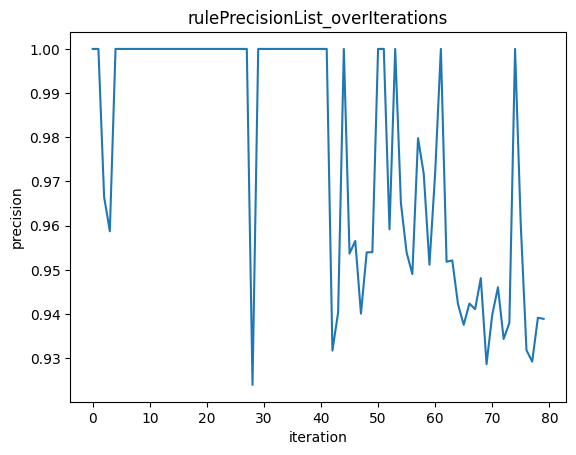

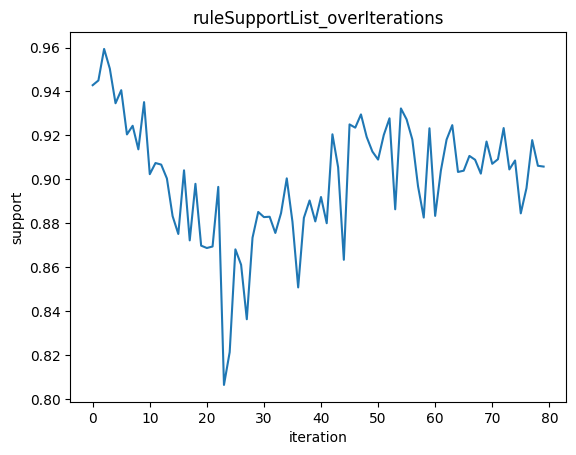

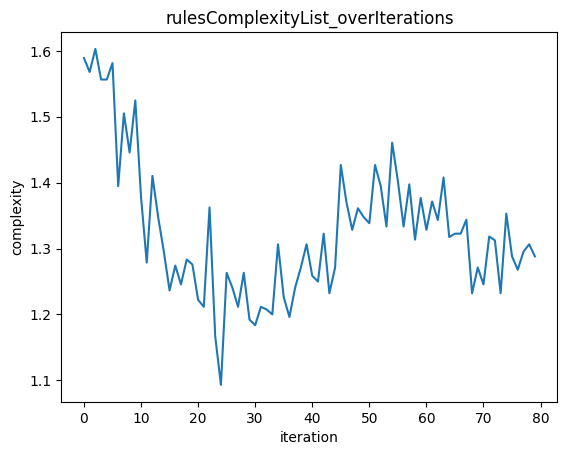

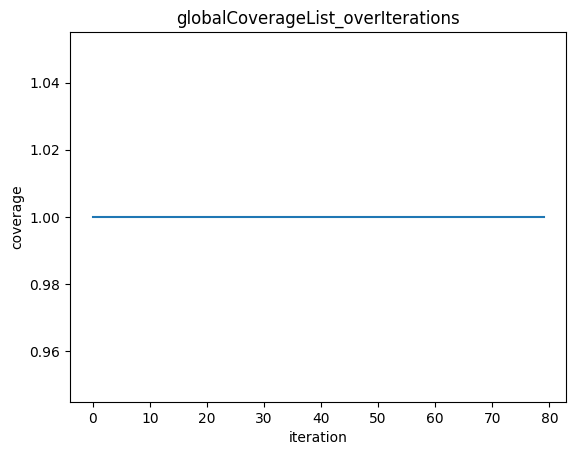

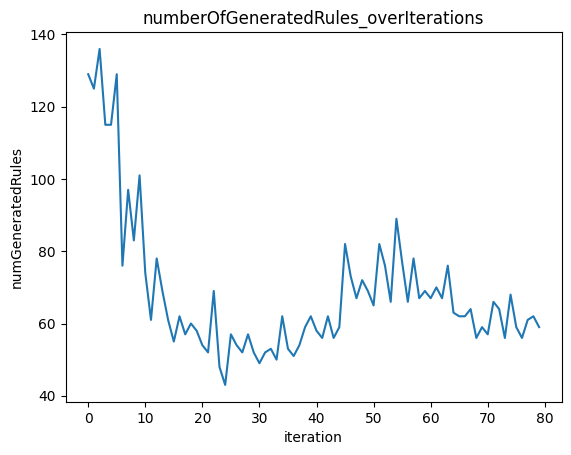

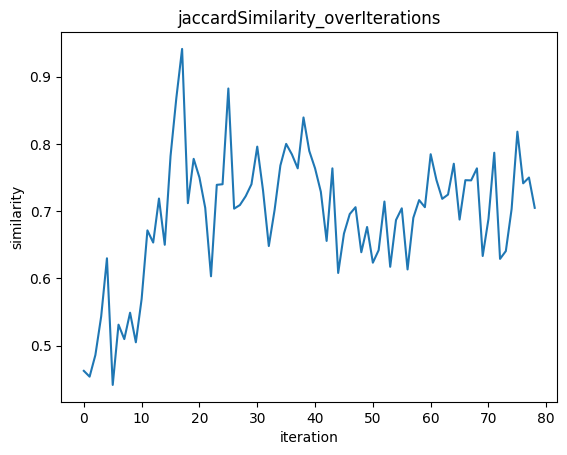

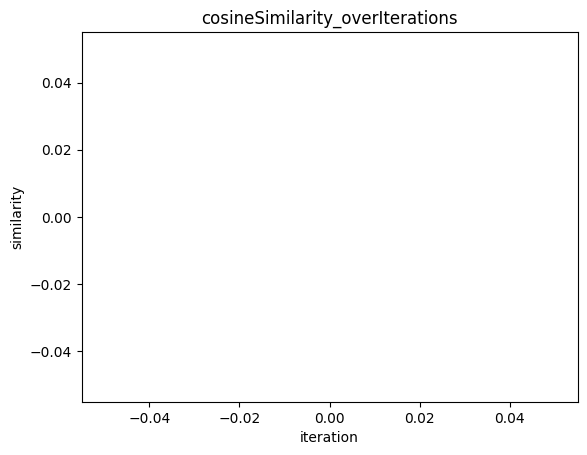

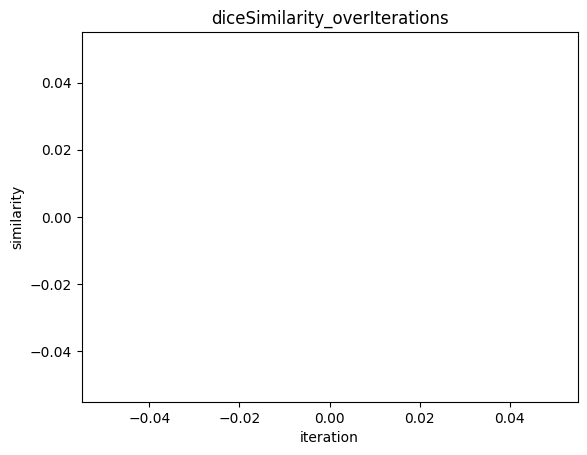

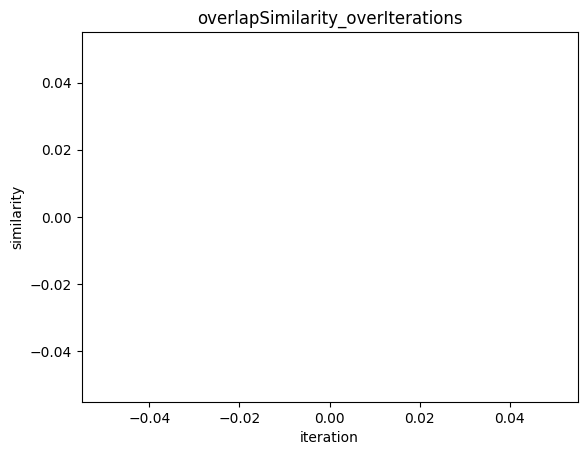

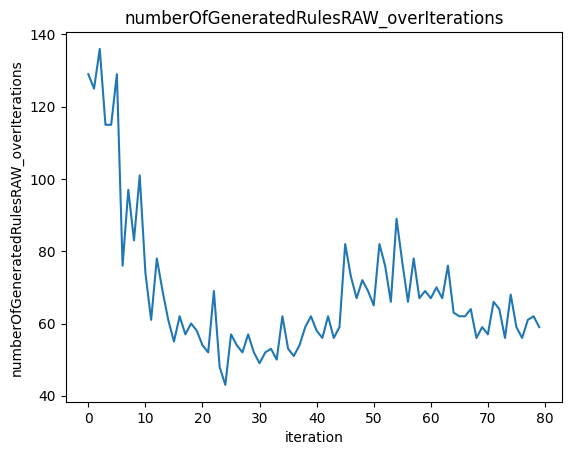

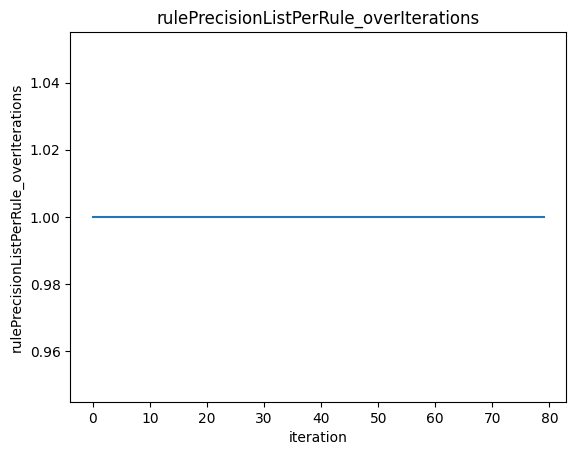

In [10]:
import os
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations"]
trackedRules_OHE = cega_utils.trackRulesList(temp_rules_list_overIterations)
print(pathToNPZ)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")